In [ ]:
import os
import math
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew, kurtosis, shapiro
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, MinMaxScaler, PolynomialFeatures, RobustScaler

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Project/train.csv')

### Data Exploration

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
numerical_features=[]
for feature in df.columns:
    if df[feature].dtype!='O' and feature!= 'SalePrice':
        numerical_features.append(feature)
print('Number of Numerical Features ',len(numerical_features))

df[numerical_features].head()

Number of Numerical Features  37


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0          2003       196.0         706  ...         548           0   
1          1976         0.0         978  ...         460         298   
2          2002       162.0         486  ...         608           0   
3          1970         0.0         216  ...         642           0   
4          2000       350.0         655  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 37 columns]

In [ ]:
temporal_features=[]
for feature in df.columns:
    if 'Year' in feature or 'Yr' in feature:
        temporal_features.append(feature)
df[temporal_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

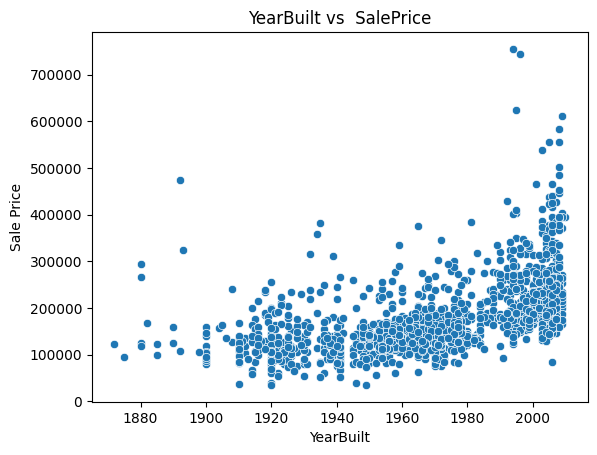

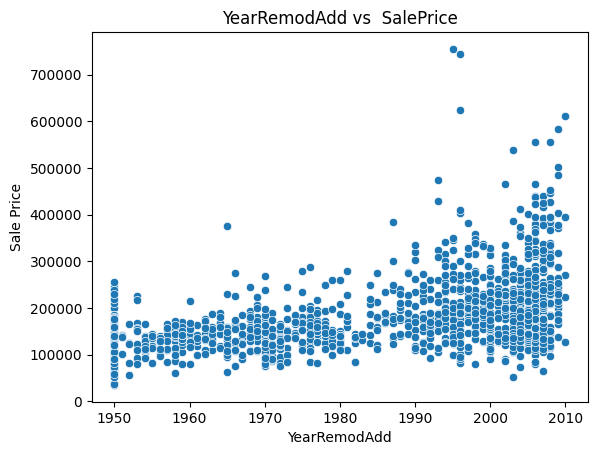

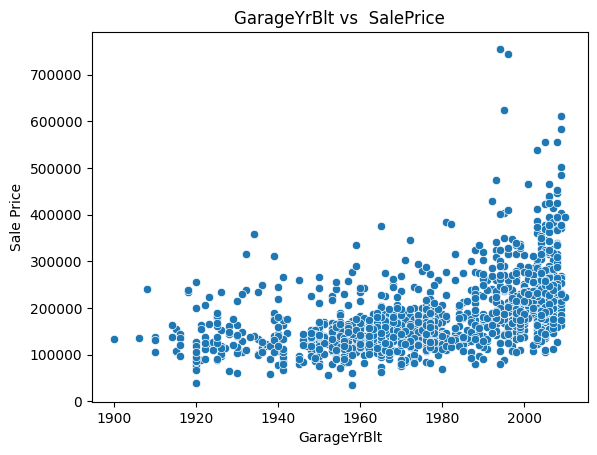

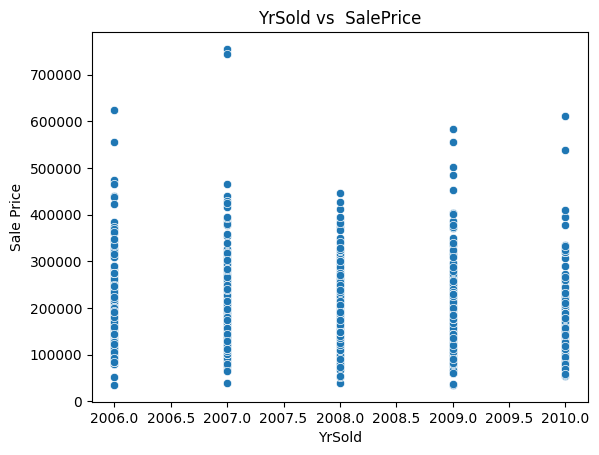

In [ ]:
for feature in temporal_features:
    sns.scatterplot(data=df,x=feature,y='SalePrice')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature +' vs '+' SalePrice')
    plt.show()

In [ ]:
for feature in temporal_features:
        if feature!='YrSold':
            df[feature]=df['YrSold']-df[feature]
df[temporal_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5             5          5.0    2008
1         31            31         31.0    2007
2          7             6          7.0    2008
3         91            36          8.0    2006
4          8             8          8.0    2008

In [ ]:
discrete_variables=[]
for feature in numerical_features:
    if len(df[feature].unique())<=25 and feature != 'SalePrice':
        discrete_variables.append(feature)
df[discrete_variables].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  YrSold  
0           0           2          0         0        0       2    2008  
1           1           2          0         0        0       5    2007  
2           1           2          0         0        0       9    2008  
3           1           3          0         0        0       2    2006  
4           1           3          0         0        0      12    2008

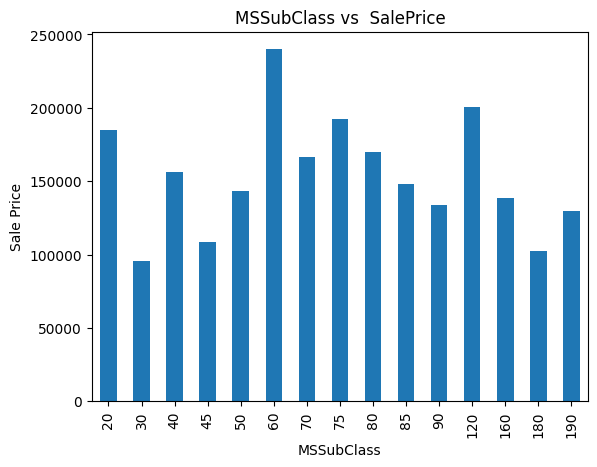

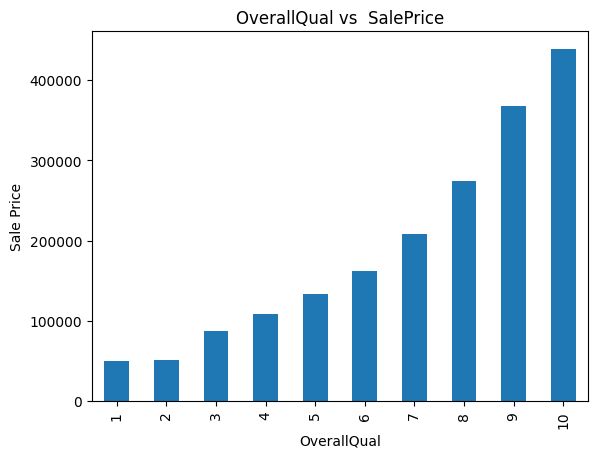

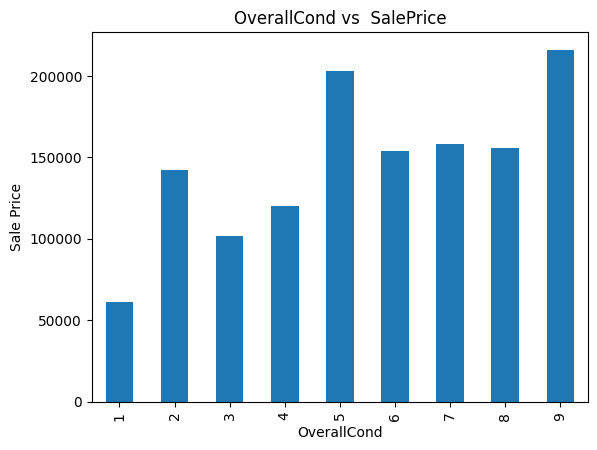

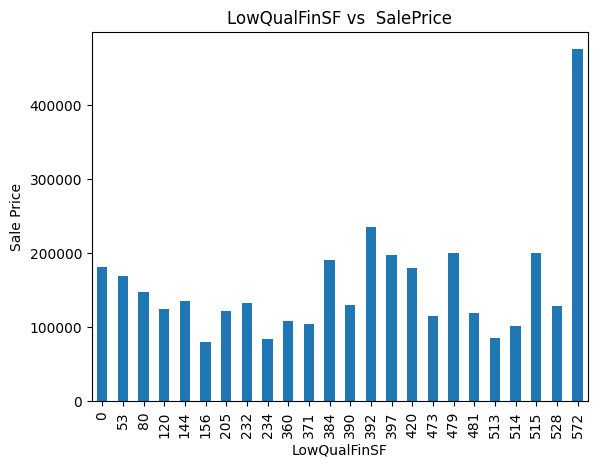

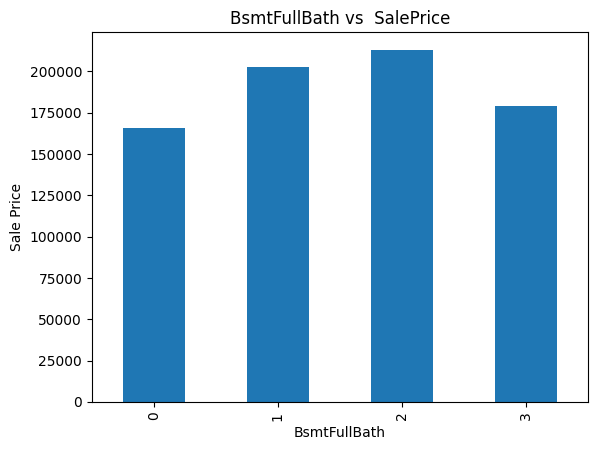

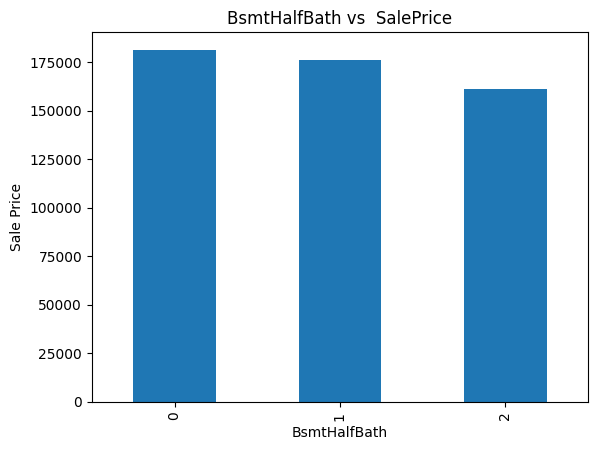

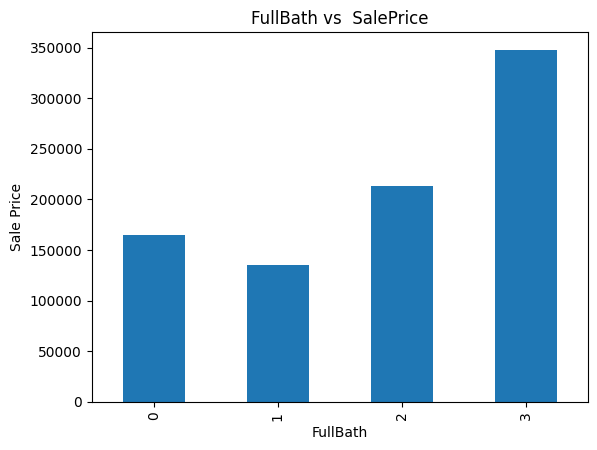

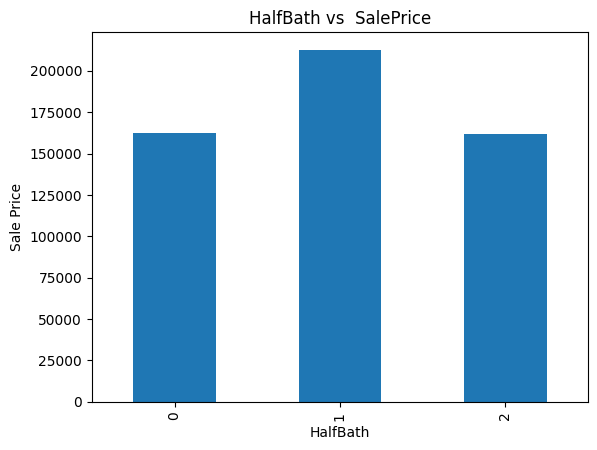

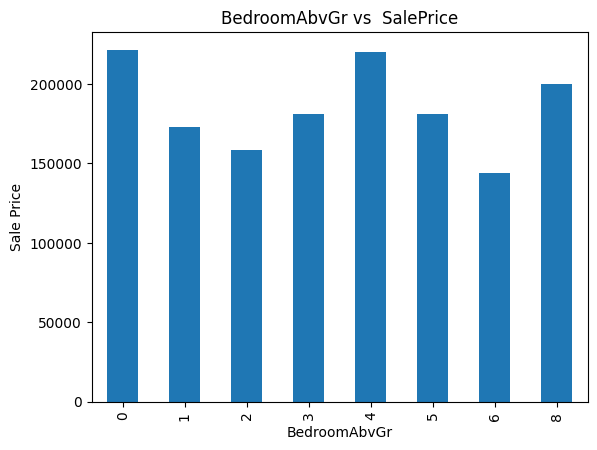

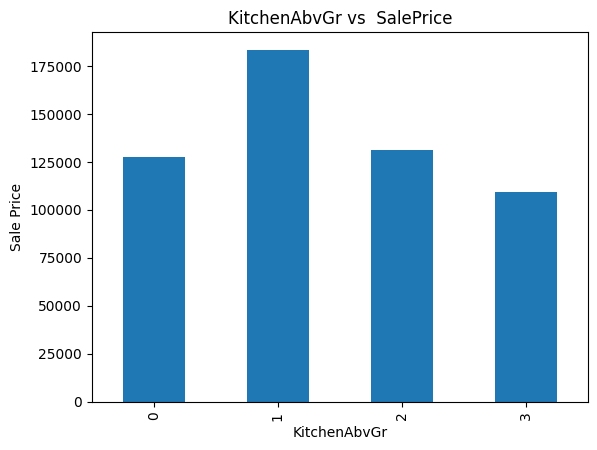

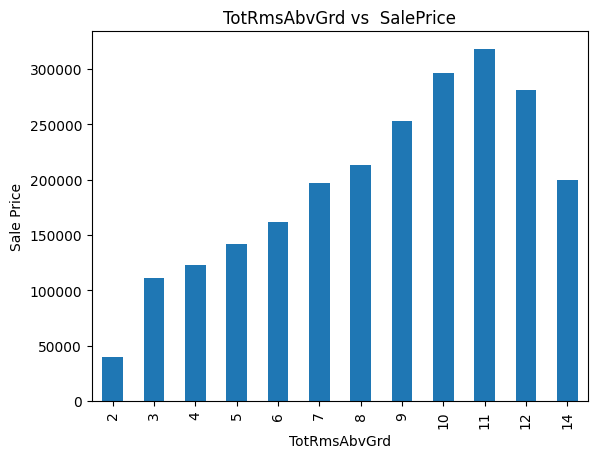

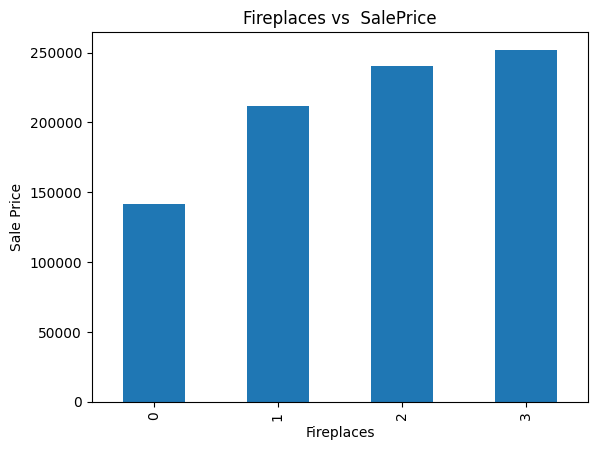

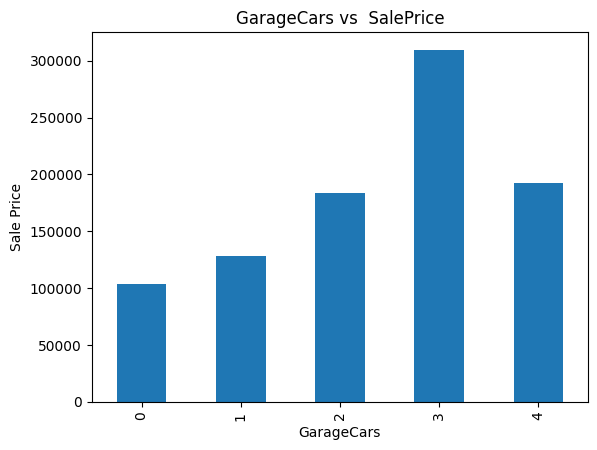

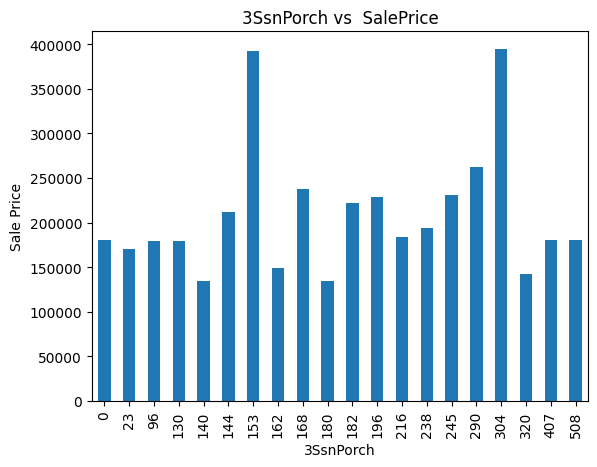

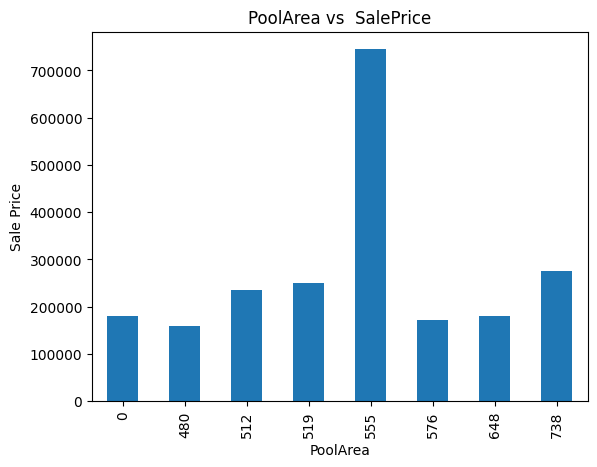

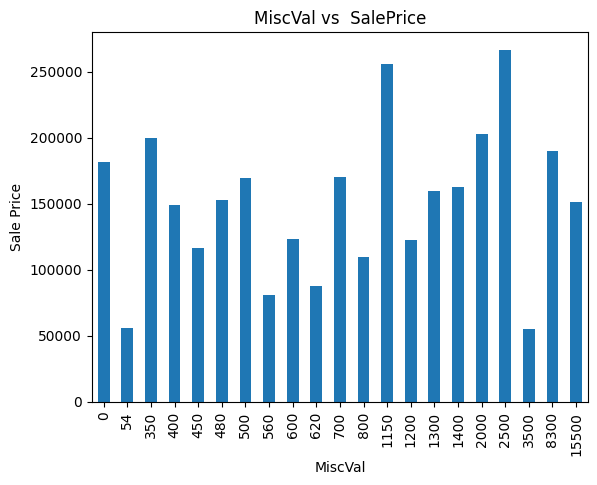

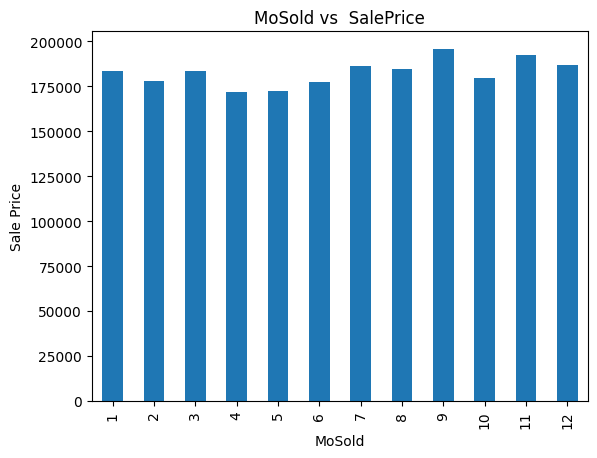

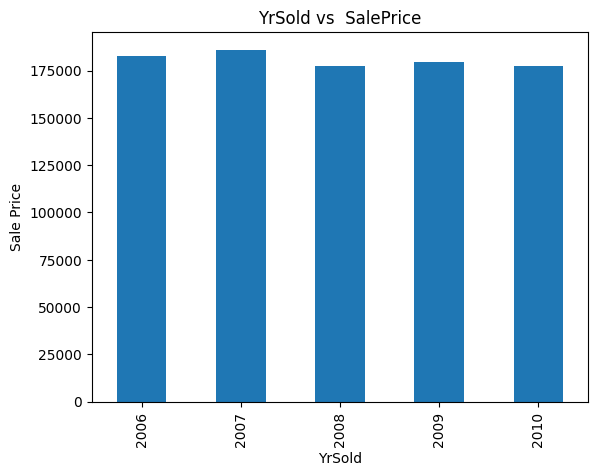

In [ ]:
for feature in discrete_variables:
     df.groupby(feature)['SalePrice'].mean().plot.bar()
     plt.xlabel(feature)
     plt.ylabel('Sale Price')
     plt.title(feature +' vs '+' SalePrice')
     plt.show()

In [ ]:
continuous_variables=[]
for feature in numerical_features:
    if feature not in discrete_variables and feature not in temporal_features:
        continuous_variables.append(feature)
df[continuous_variables].head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  
0           61              0            0  
1            0              0            0  
2           42              0            0  
3           35            272            0  
4           84              0            0

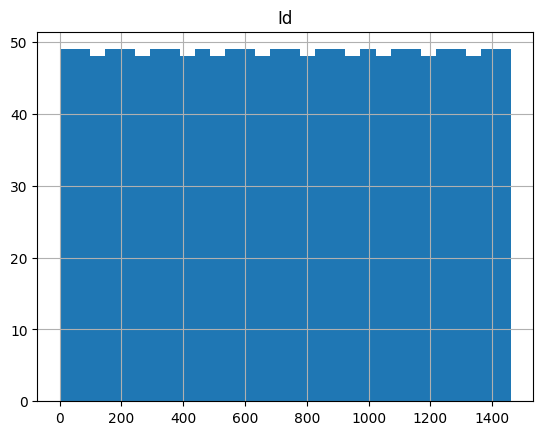

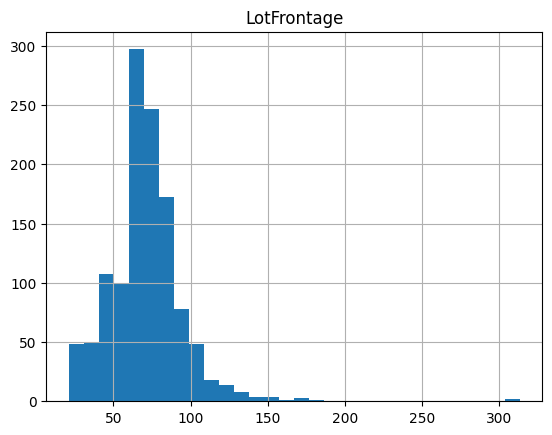

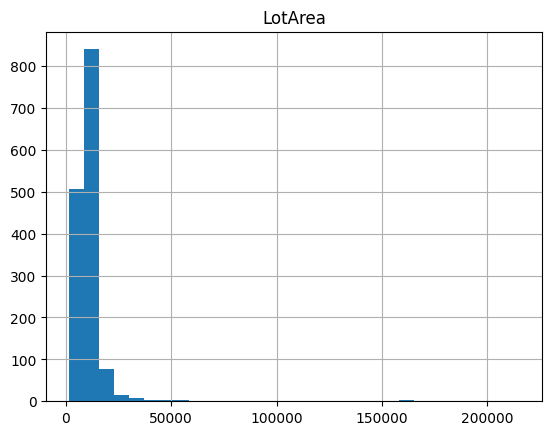

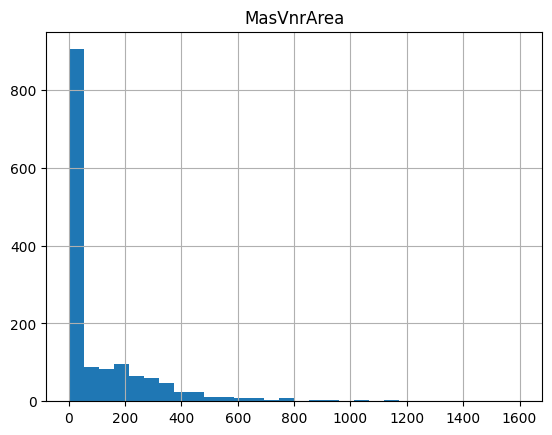

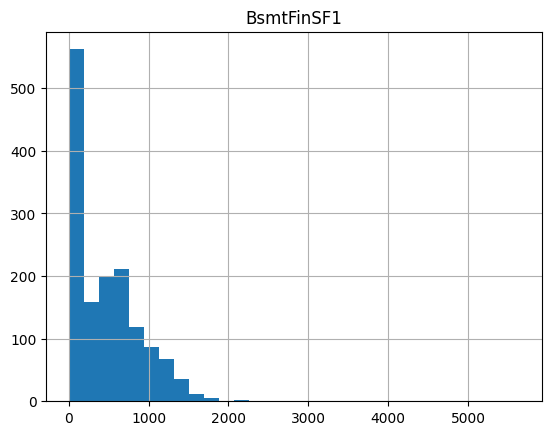

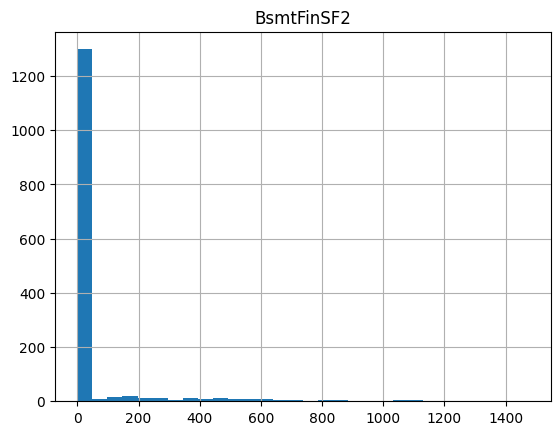

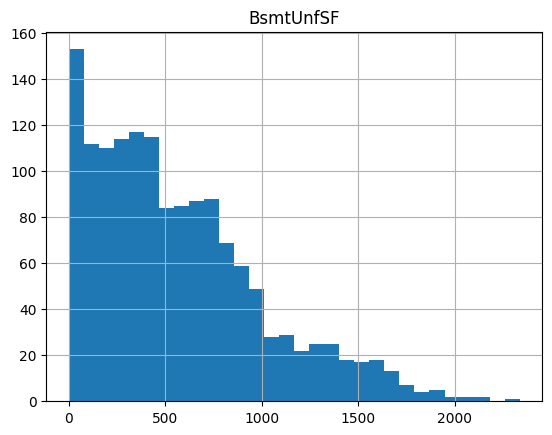

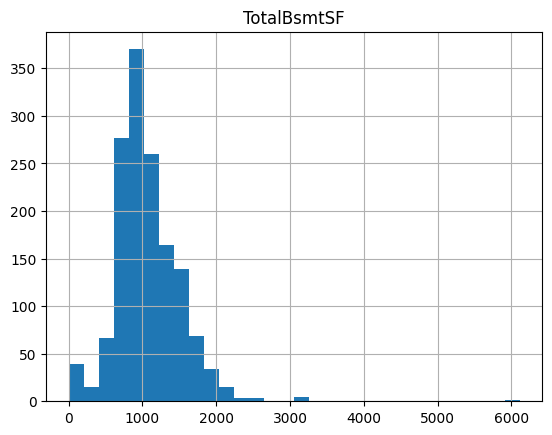

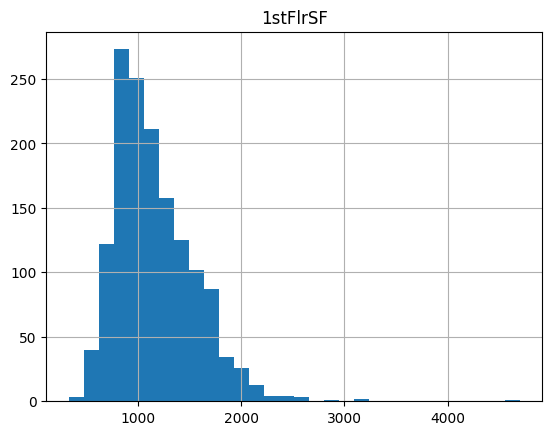

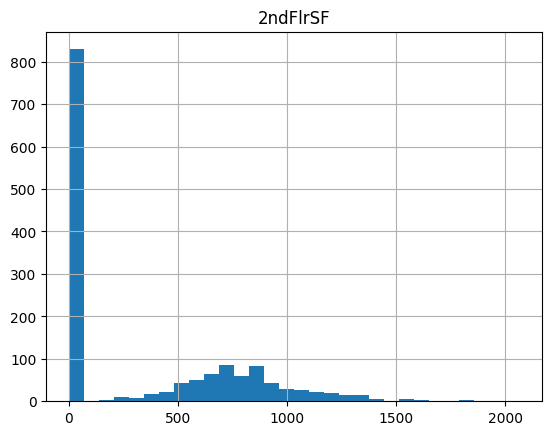

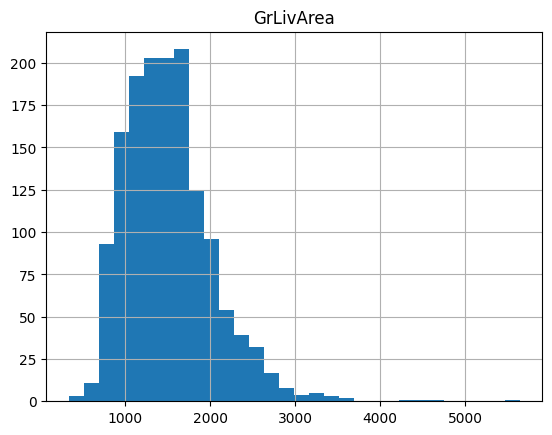

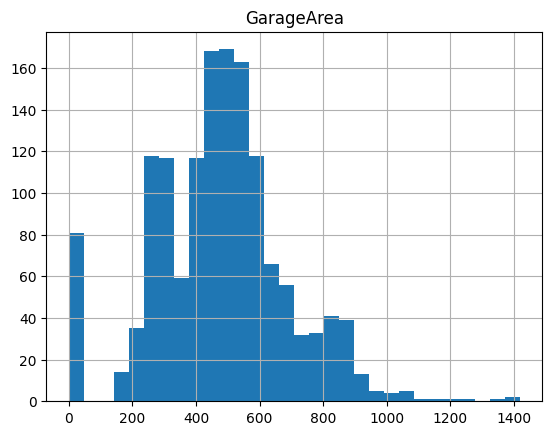

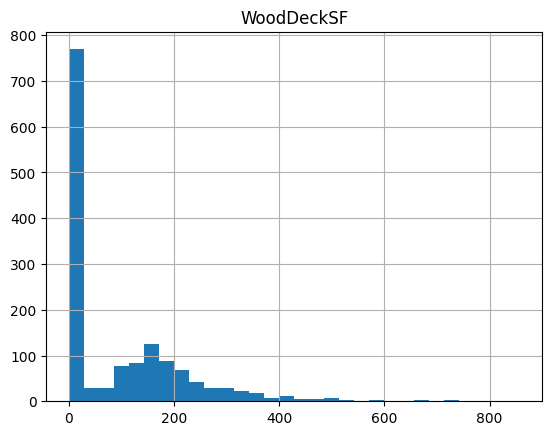

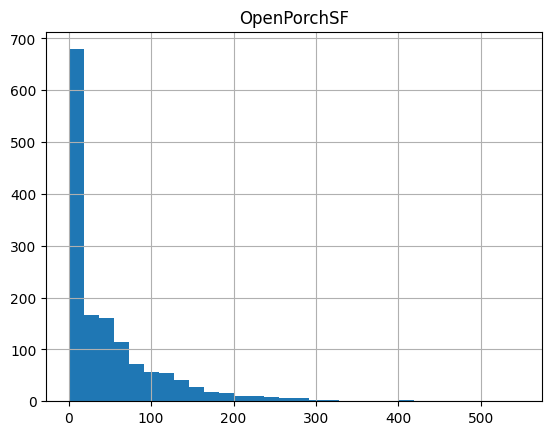

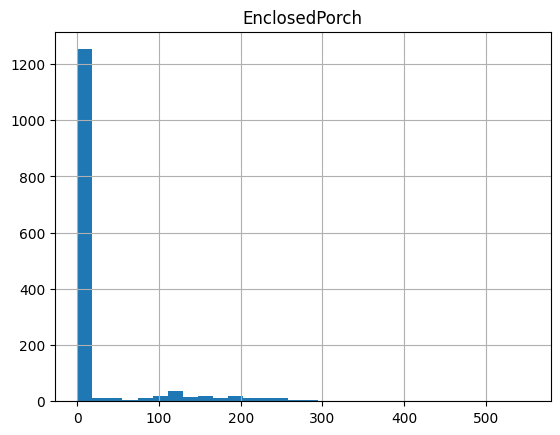

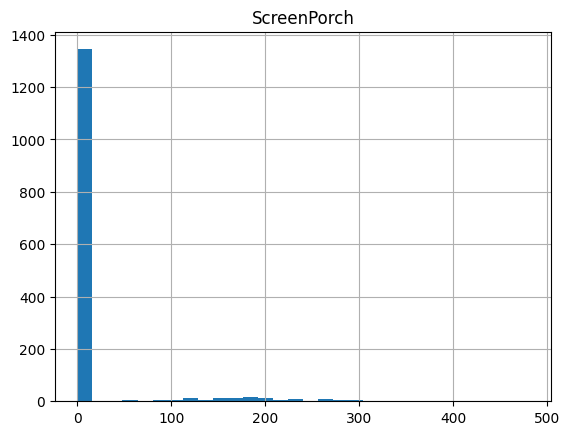

In [ ]:
for feature in continuous_variables:
     df[feature].hist(bins=30)
     plt.title(feature)
     plt.show()

In [ ]:
categorical_features=[]
for feature in df.columns:
    if df[feature].dtype=='O':
        categorical_features.append(feature)
print('Number of Categorical Features ',len(categorical_features))
df[categorical_features].head()

Number of Categorical Features  43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [ ]:
unique_counts = df.nunique().tolist()
column_names = df.columns.tolist()

for name, count in zip(column_names, unique_counts):
    print(f"{name}, Unique Values: {count}")

Id, Unique Values: 1460
MSSubClass, Unique Values: 15
MSZoning, Unique Values: 5
LotFrontage, Unique Values: 110
LotArea, Unique Values: 1073
Street, Unique Values: 2
Alley, Unique Values: 2
LotShape, Unique Values: 4
LandContour, Unique Values: 4
Utilities, Unique Values: 2
LotConfig, Unique Values: 5
LandSlope, Unique Values: 3
Neighborhood, Unique Values: 25
Condition1, Unique Values: 9
Condition2, Unique Values: 8
BldgType, Unique Values: 5
HouseStyle, Unique Values: 8
OverallQual, Unique Values: 10
OverallCond, Unique Values: 9
YearBuilt, Unique Values: 122
YearRemodAdd, Unique Values: 62
RoofStyle, Unique Values: 6
RoofMatl, Unique Values: 8
Exterior1st, Unique Values: 15
Exterior2nd, Unique Values: 16
MasVnrType, Unique Values: 3
MasVnrArea, Unique Values: 327
ExterQual, Unique Values: 4
ExterCond, Unique Values: 5
Foundation, Unique Values: 6
BsmtQual, Unique Values: 4
BsmtCond, Unique Values: 4
BsmtExposure, Unique Values: 4
BsmtFinType1, Unique Values: 6
BsmtFinSF1, Unique Va

In [ ]:
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
****************************************
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
****************************************
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
****************************************
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
****************************************
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
****************************************
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
****************************************
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
****************************************
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
****************************************
Neighborhood
NAmes      2

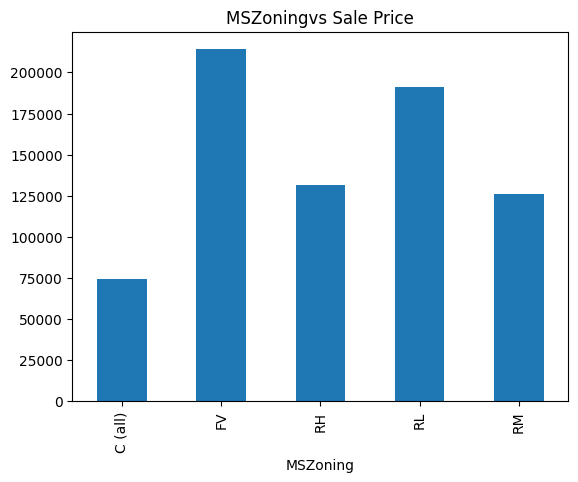

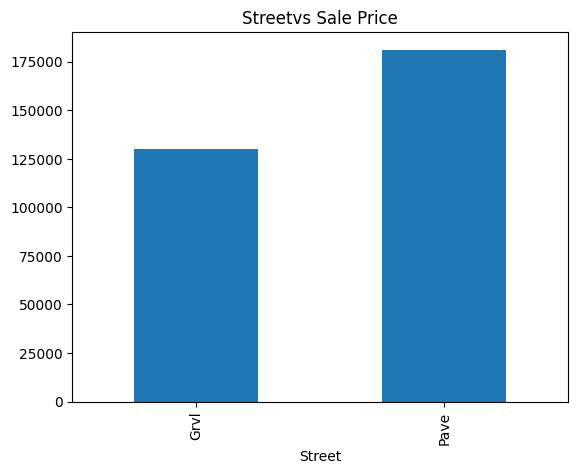

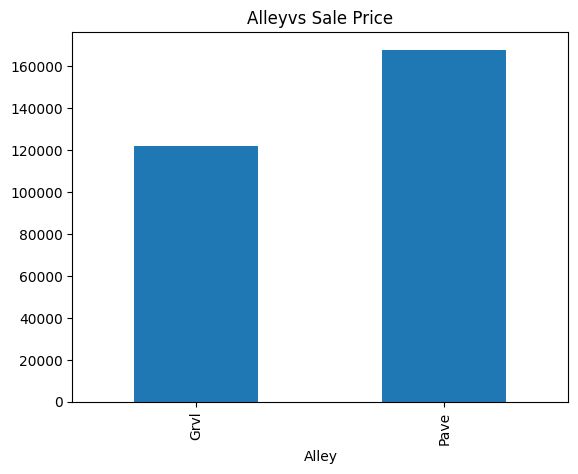

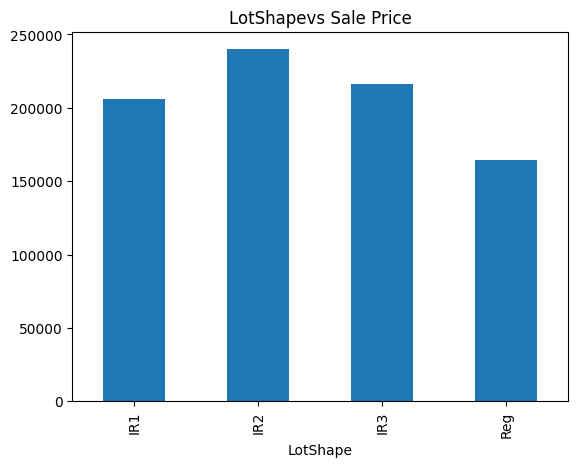

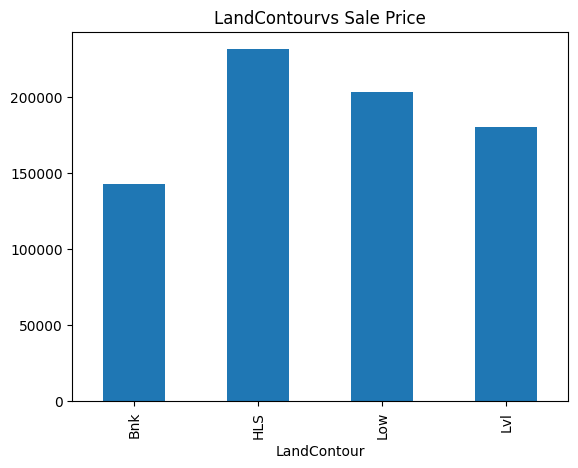

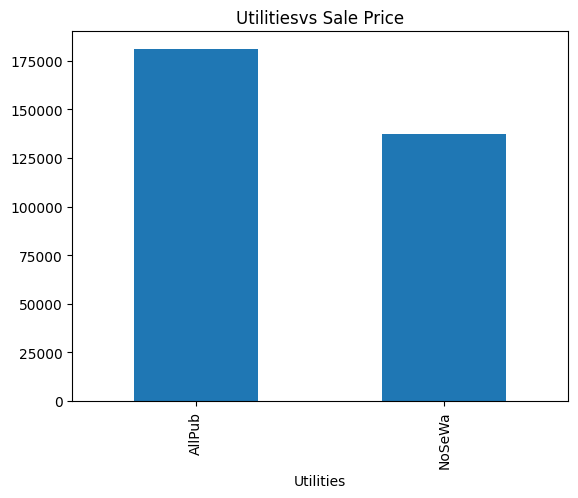

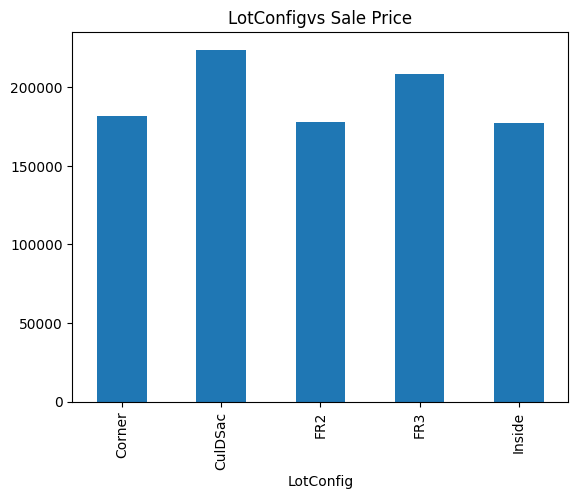

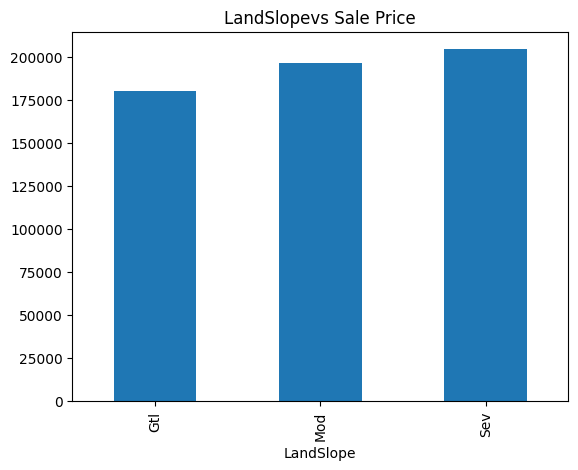

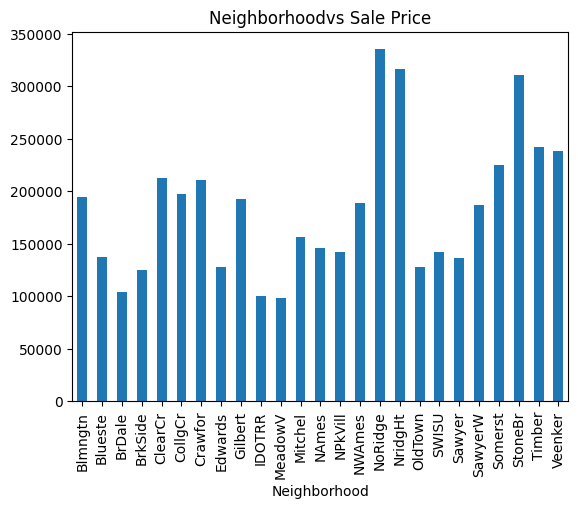

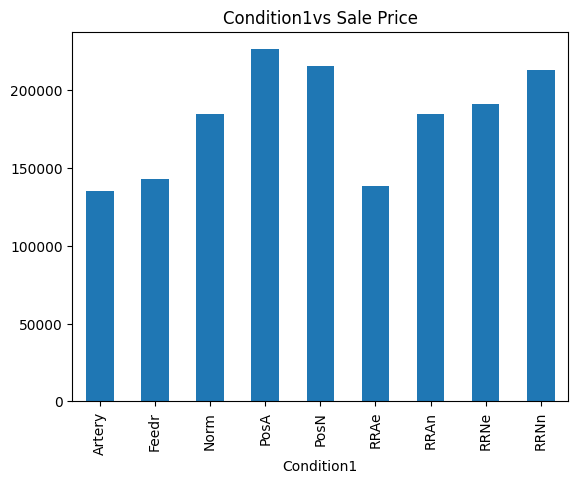

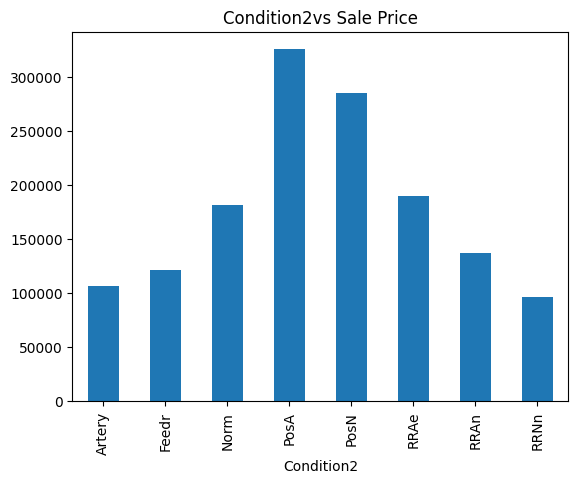

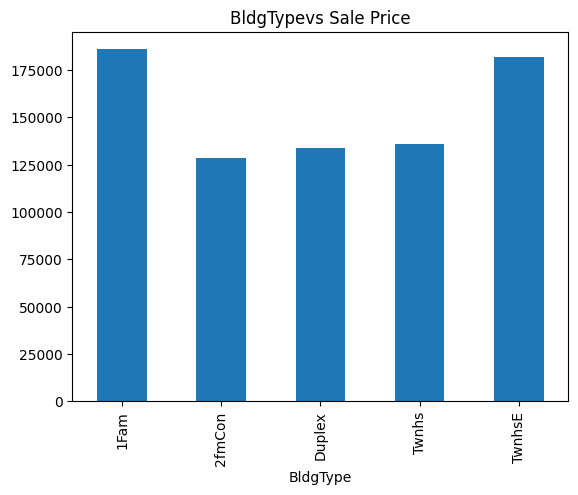

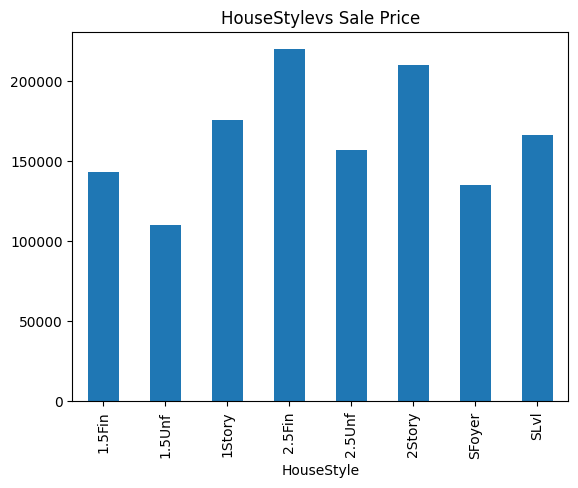

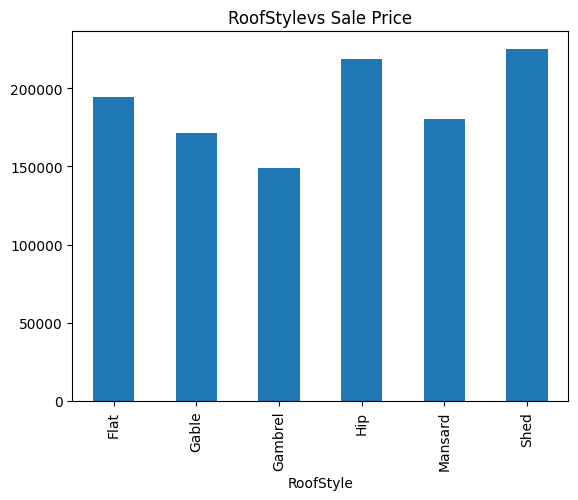

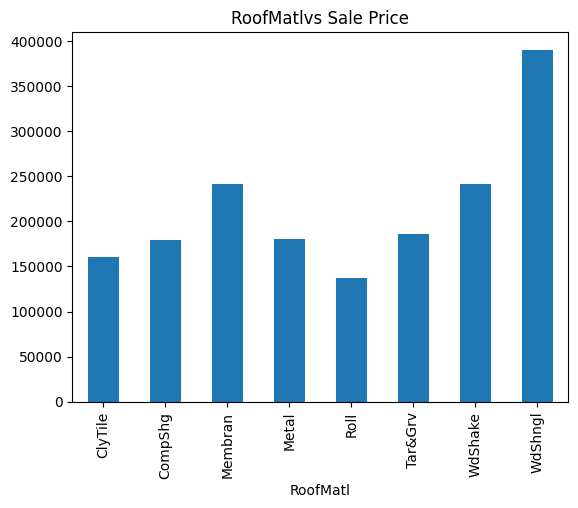

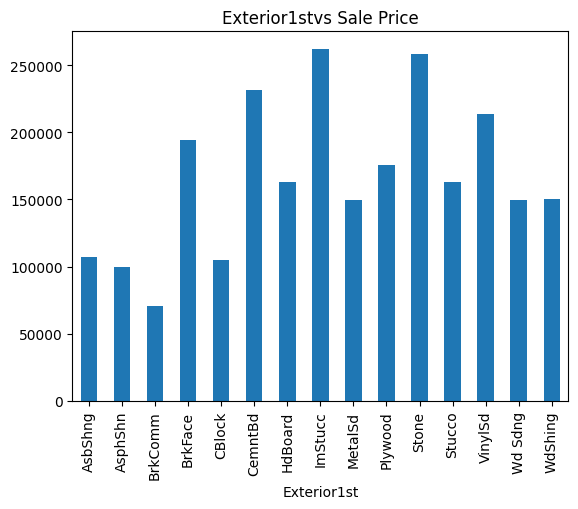

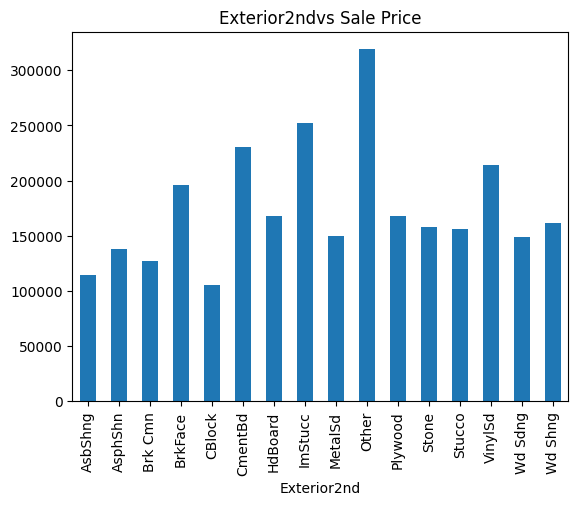

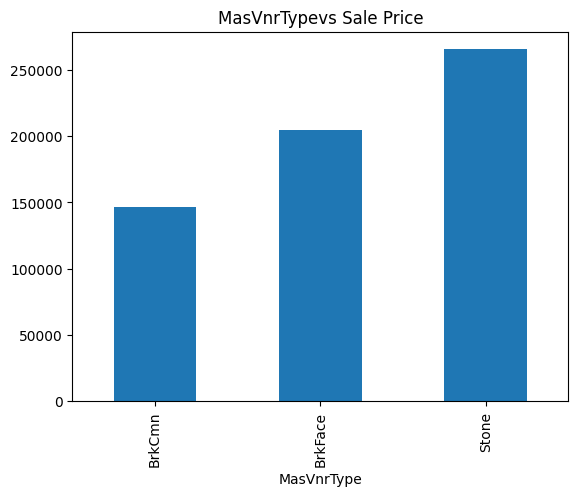

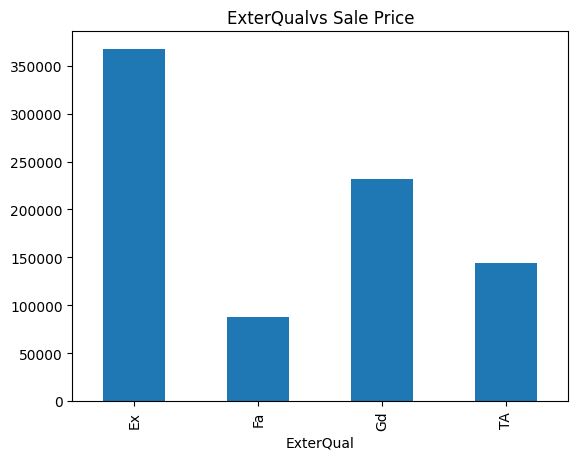

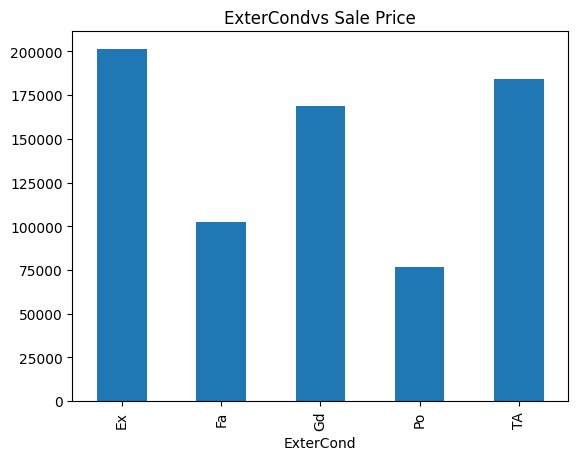

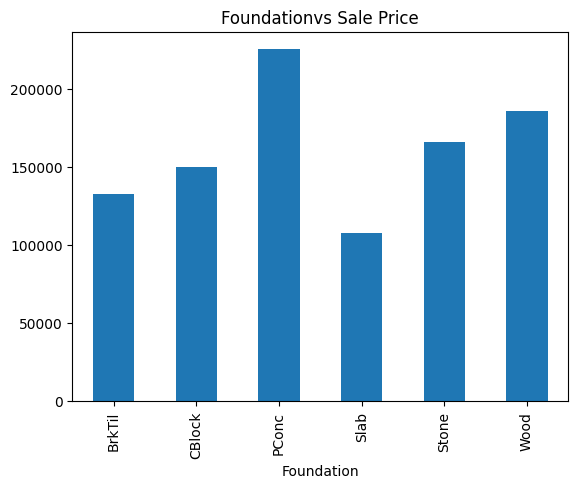

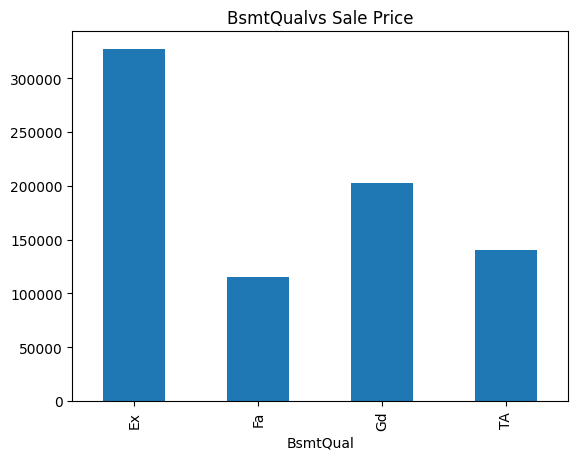

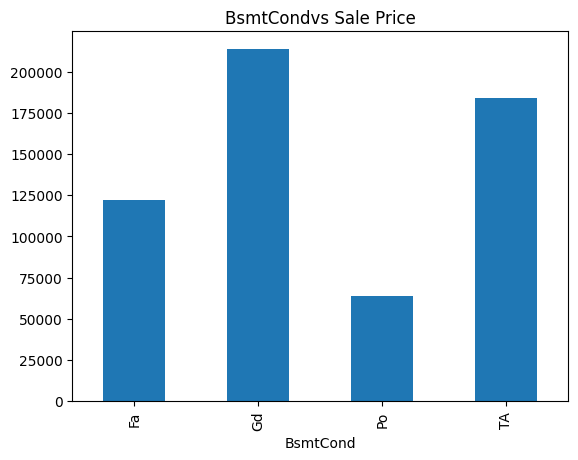

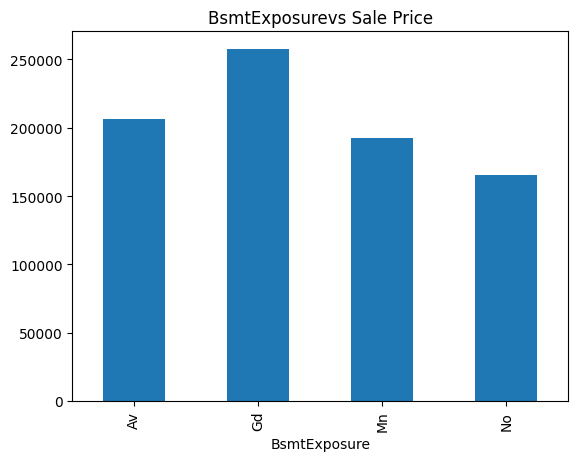

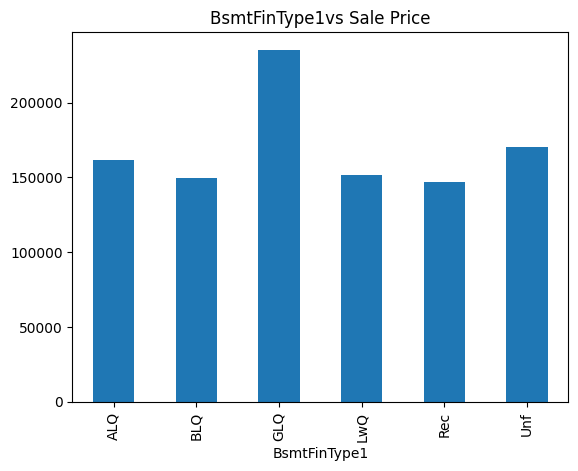

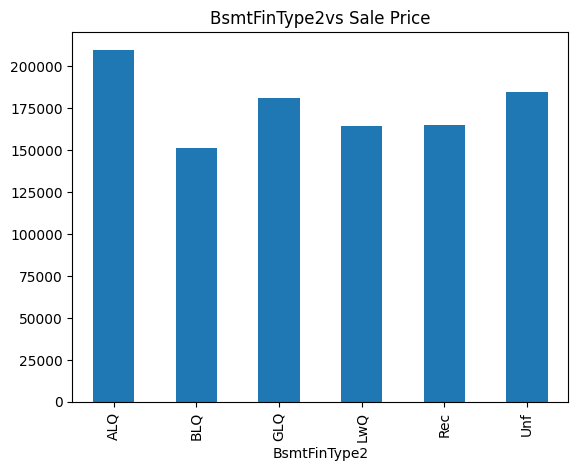

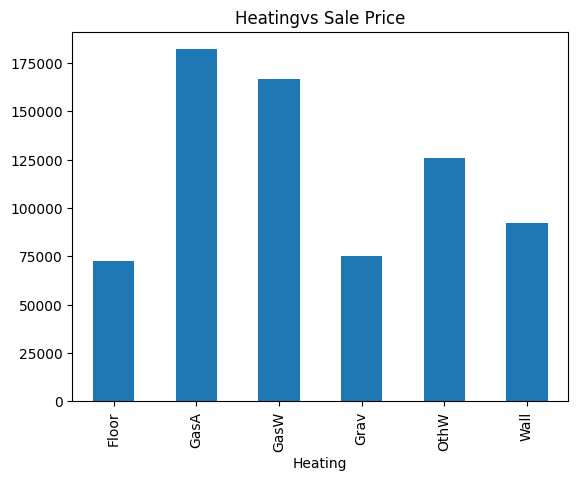

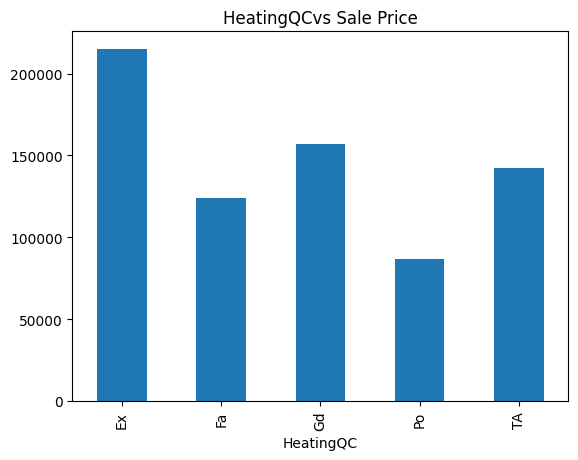

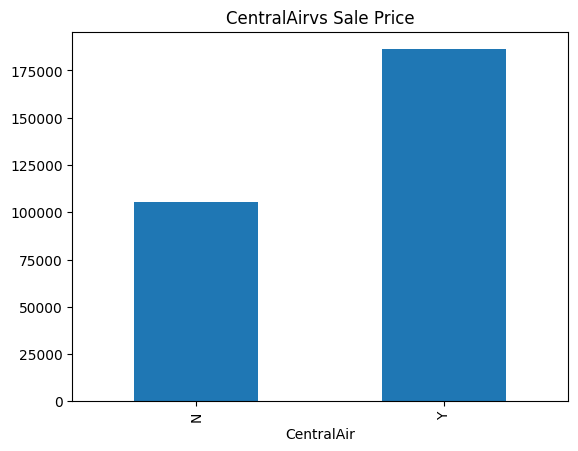

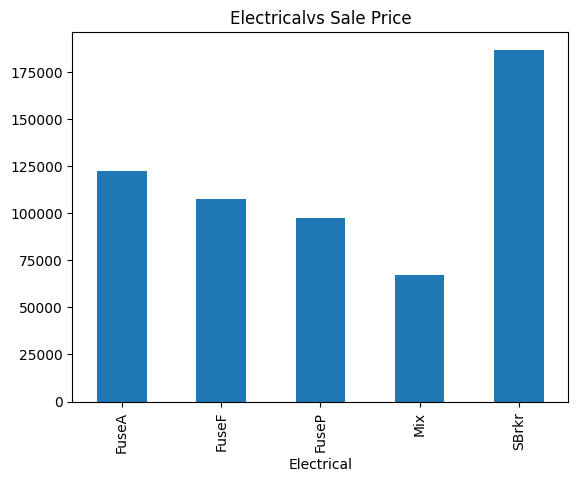

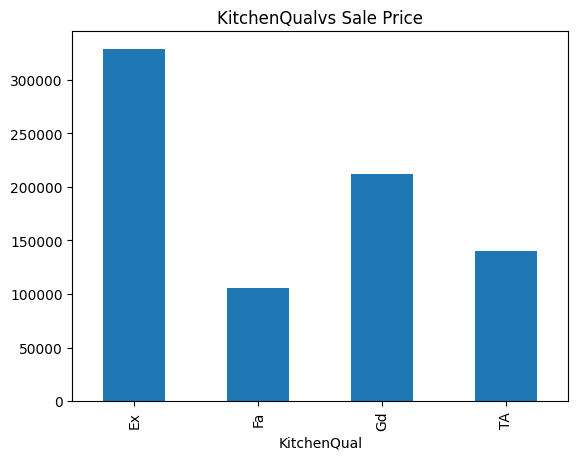

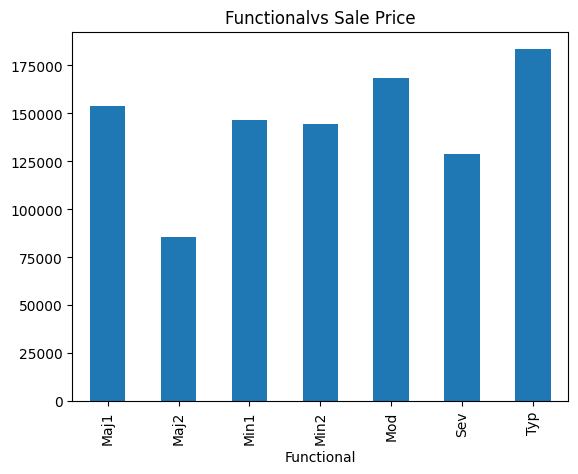

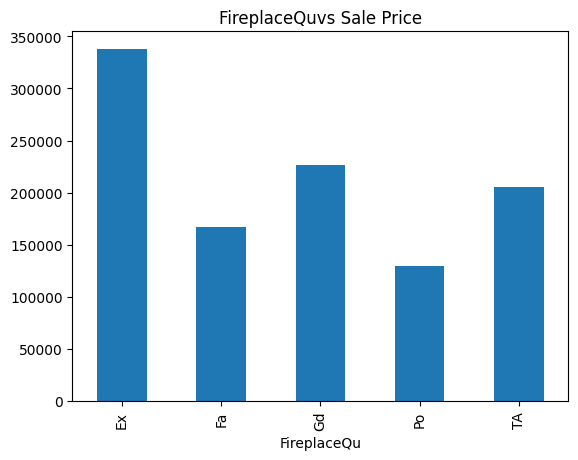

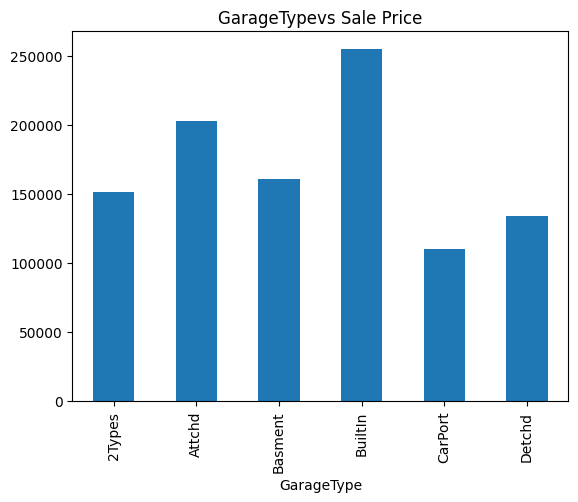

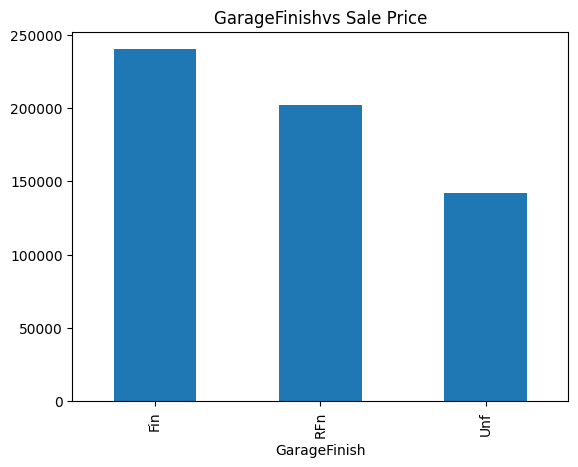

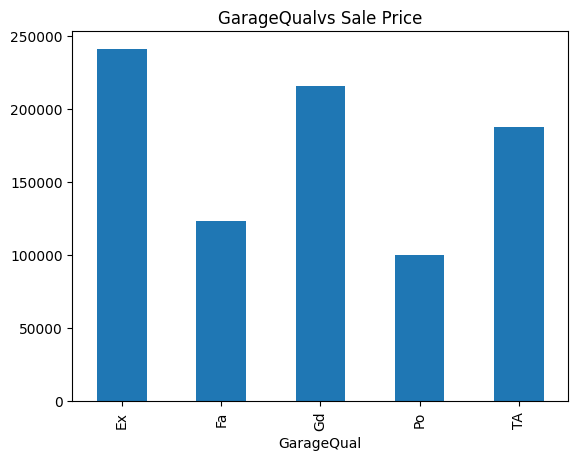

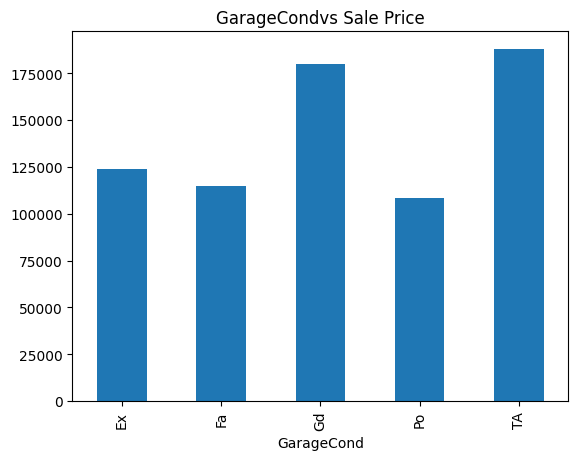

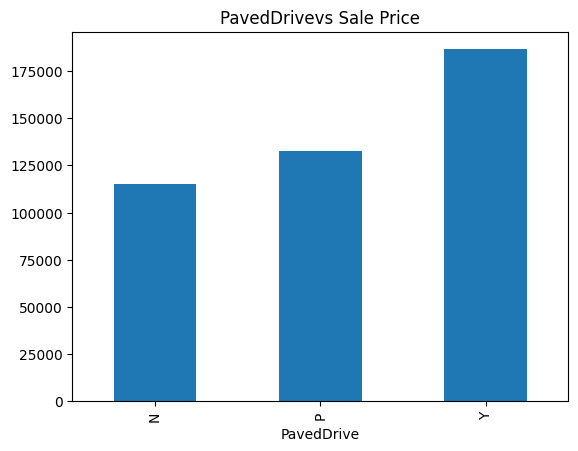

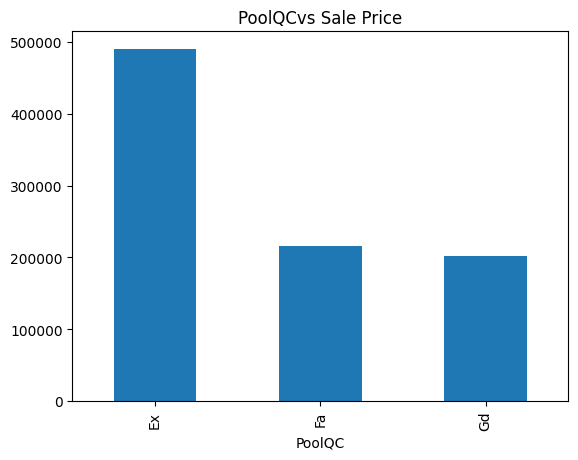

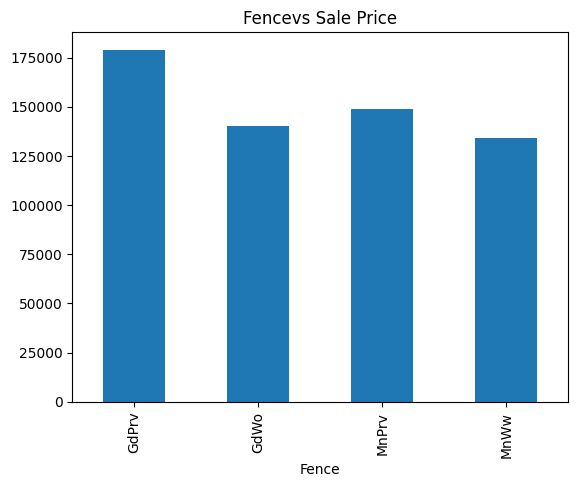

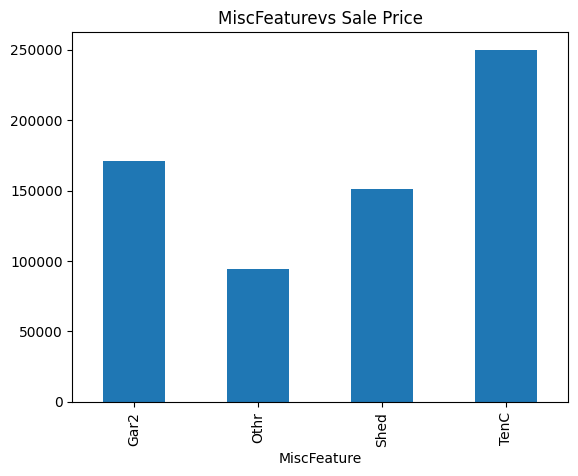

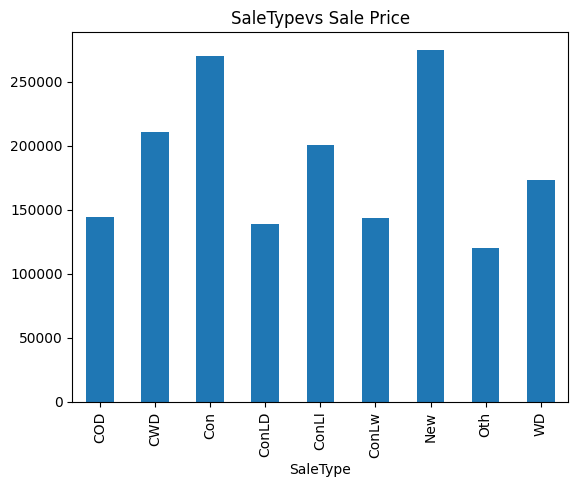

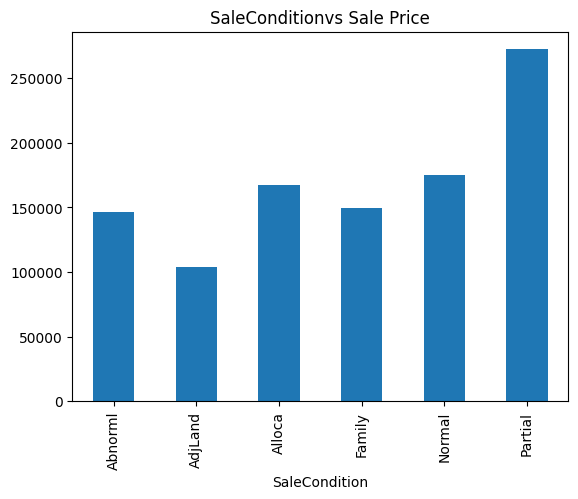

In [ ]:
for feature in categorical_features:
    df.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature + 'vs Sale Price')
    plt.show()

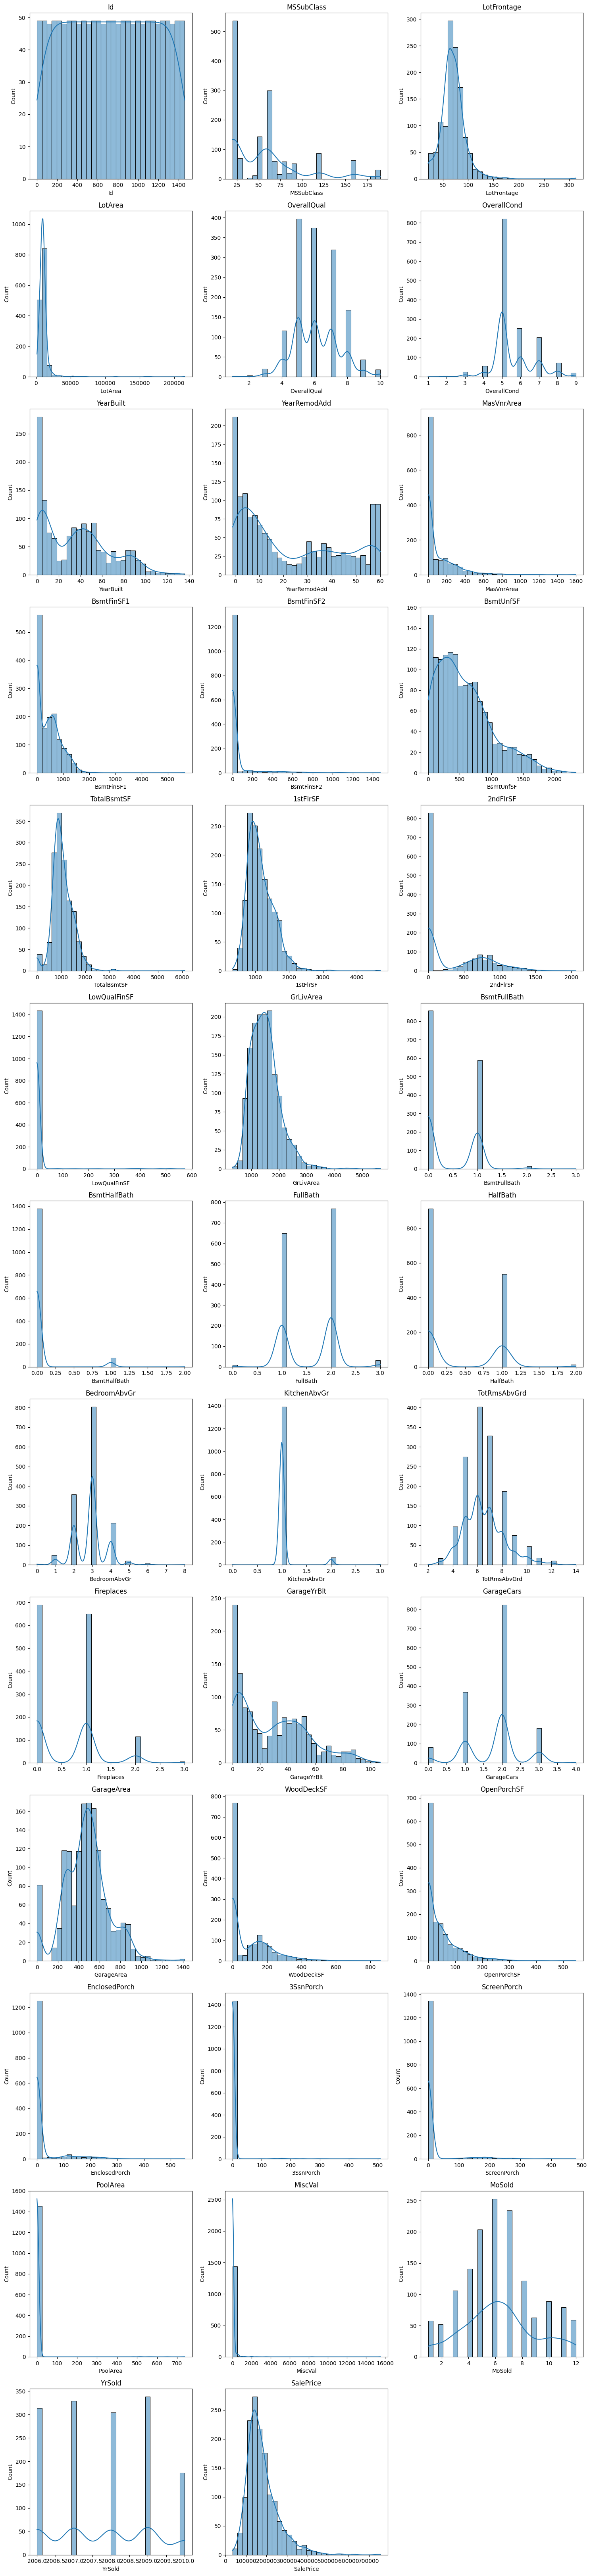

In [ ]:
num_features = df.select_dtypes(include=["float64", "int64"]).columns
num_plots = len(num_features)

num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
for col in num_features:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")

Id: Skewness = 0.00, Kurtosis = -1.20
MSSubClass: Skewness = 1.41, Kurtosis = 1.57
LotFrontage: Skewness = nan, Kurtosis = nan
LotArea: Skewness = 12.20, Kurtosis = 202.54
OverallQual: Skewness = 0.22, Kurtosis = 0.09
OverallCond: Skewness = 0.69, Kurtosis = 1.10
YearBuilt: Skewness = 0.61, Kurtosis = -0.44
YearRemodAdd: Skewness = 0.50, Kurtosis = -1.27
MasVnrArea: Skewness = nan, Kurtosis = nan
BsmtFinSF1: Skewness = 1.68, Kurtosis = 11.08
BsmtFinSF2: Skewness = 4.25, Kurtosis = 20.04
BsmtUnfSF: Skewness = 0.92, Kurtosis = 0.47
TotalBsmtSF: Skewness = 1.52, Kurtosis = 13.20
1stFlrSF: Skewness = 1.38, Kurtosis = 5.72
2ndFlrSF: Skewness = 0.81, Kurtosis = -0.56
LowQualFinSF: Skewness = 9.00, Kurtosis = 82.95
GrLivArea: Skewness = 1.37, Kurtosis = 4.87
BsmtFullBath: Skewness = 0.60, Kurtosis = -0.84
BsmtHalfBath: Skewness = 4.10, Kurtosis = 16.34
FullBath: Skewness = 0.04, Kurtosis = -0.86
HalfBath: Skewness = 0.68, Kurtosis = -1.08
BedroomAbvGr: Skewness = 0.21, Kurtosis = 2.22
Kitchen

In [ ]:
for col in num_features:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: p-value = {p:.4f}")

Id: p-value = 0.0000
MSSubClass: p-value = 0.0000
LotFrontage: p-value = 0.0000
LotArea: p-value = 0.0000
OverallQual: p-value = 0.0000
OverallCond: p-value = 0.0000
YearBuilt: p-value = 0.0000
YearRemodAdd: p-value = 0.0000
MasVnrArea: p-value = 0.0000
BsmtFinSF1: p-value = 0.0000
BsmtFinSF2: p-value = 0.0000
BsmtUnfSF: p-value = 0.0000
TotalBsmtSF: p-value = 0.0000
1stFlrSF: p-value = 0.0000
2ndFlrSF: p-value = 0.0000
LowQualFinSF: p-value = 0.0000
GrLivArea: p-value = 0.0000
BsmtFullBath: p-value = 0.0000
BsmtHalfBath: p-value = 0.0000
FullBath: p-value = 0.0000
HalfBath: p-value = 0.0000
BedroomAbvGr: p-value = 0.0000
KitchenAbvGr: p-value = 0.0000
TotRmsAbvGrd: p-value = 0.0000
Fireplaces: p-value = 0.0000
GarageYrBlt: p-value = 0.0000
GarageCars: p-value = 0.0000
GarageArea: p-value = 0.0000
WoodDeckSF: p-value = 0.0000
OpenPorchSF: p-value = 0.0000
EnclosedPorch: p-value = 0.0000
3SsnPorch: p-value = 0.0000
ScreenPorch: p-value = 0.0000
PoolArea: p-value = 0.0000
MiscVal: p-valu

### Missing values

In [ ]:
missing_values_count = df.isnull().sum()

missing_values_percent = (missing_values_count / len(df)) * 100

missing_values = pd.DataFrame({'Missing Count': missing_values_count, 'Missing Percent': missing_values_percent})
missing_values = missing_values[missing_values['Missing Count'] > 0]

print("Features with Missing Values:")
print(missing_values.sort_values(by="Missing Percent", ascending=False))

Features with Missing Values:
              Missing Count  Missing Percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
MasVnrType              872        59.726027
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageType               81         5.547945
GarageYrBlt              81         5.547945
GarageFinish             81         5.547945
GarageQual               81         5.547945
GarageCond               81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtQual                 37         2.534247
BsmtCond                 37         2.534247
BsmtFinType1             37         2.534247
MasVnrArea                8         0.547945
Electrical                1         0.068493


In [ ]:
df['Id'].duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','MasVnrType','FireplaceQu'],axis=1, inplace=True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 74 columns]

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df['LotFrontage'] = knn_imputer.fit_transform(df[['LotFrontage']])

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

numeric_imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

for col in categorical_columns:
    df[col] = df[col].astype(str)
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
missing_values_count = df.isnull().sum()

missing_values_percent = (missing_values_count / len(df)) * 100

missing_values = pd.DataFrame({'Missing Count': missing_values_count, 'Missing Percent': missing_values_percent})
missing_values = missing_values[missing_values['Missing Count'] > 0]

print("Features with Missing Values:")
print(missing_values.sort_values(by="Missing Percent", ascending=False))

Features with Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []


### Outliers

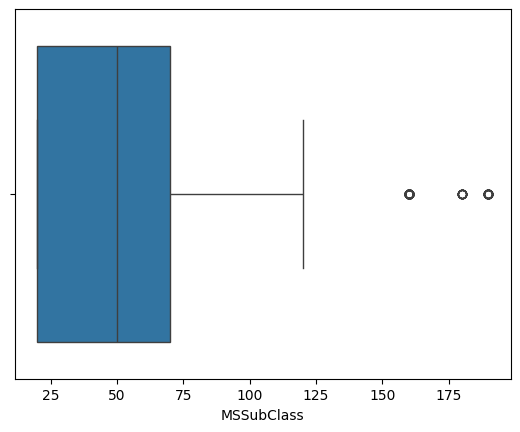

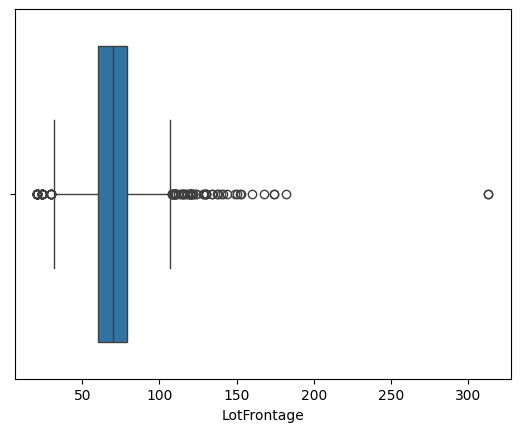

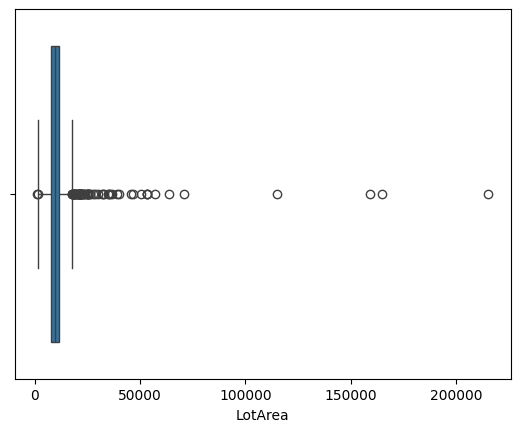

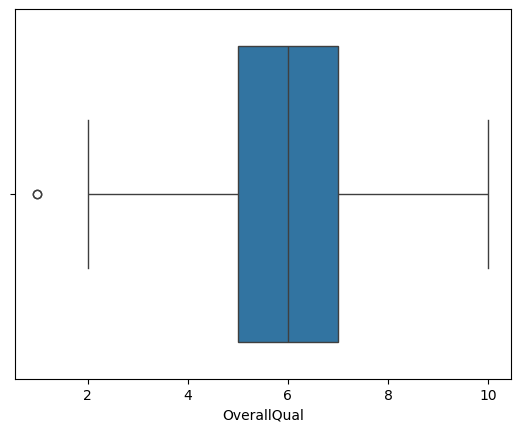

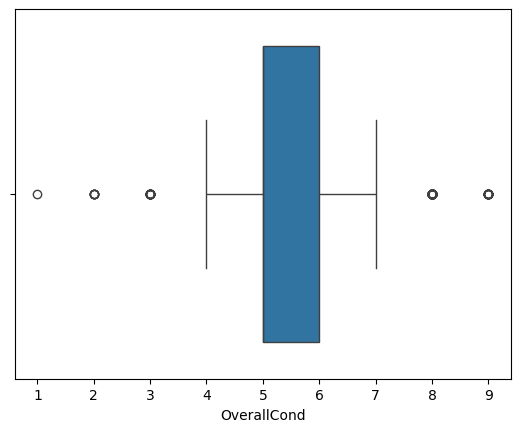

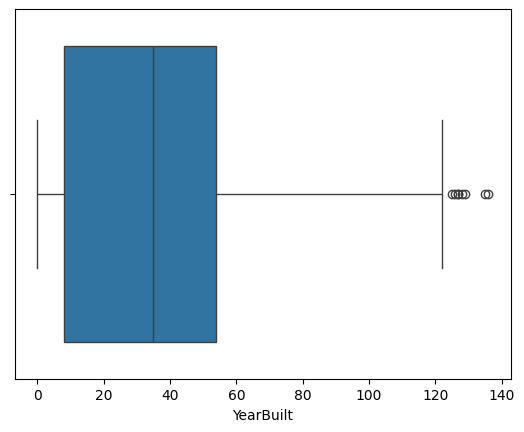

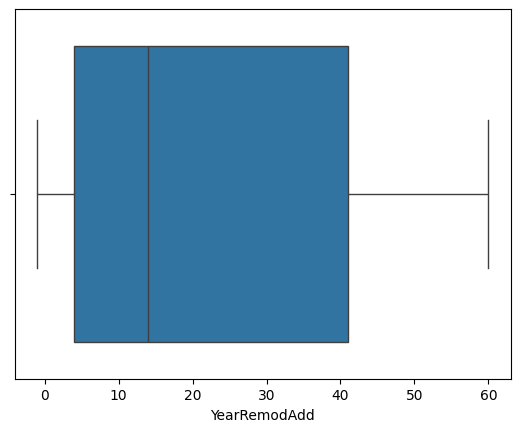

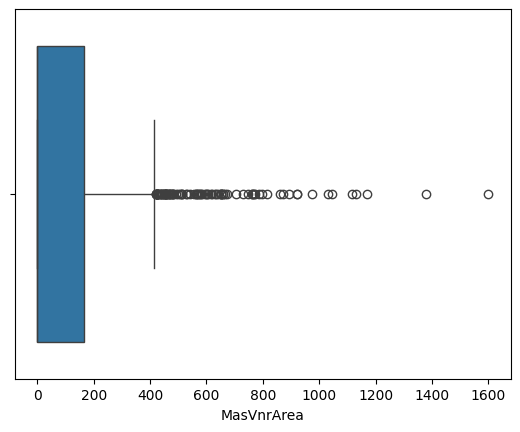

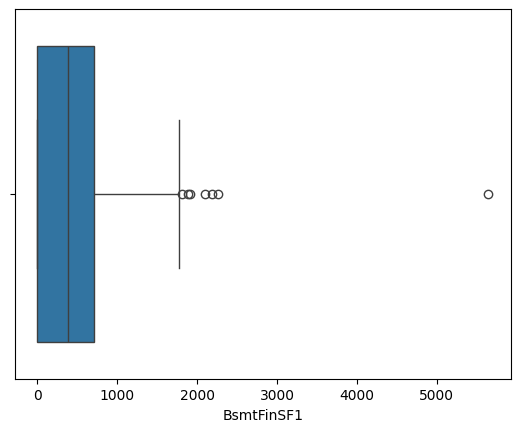

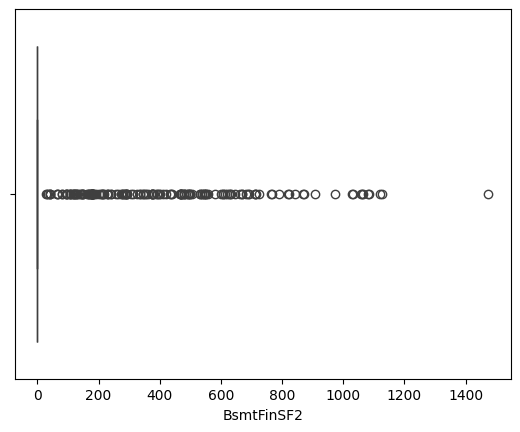

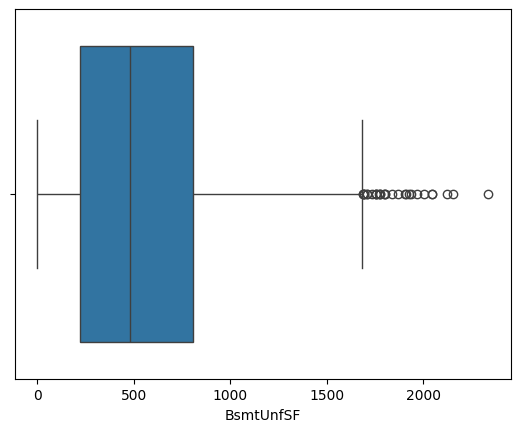

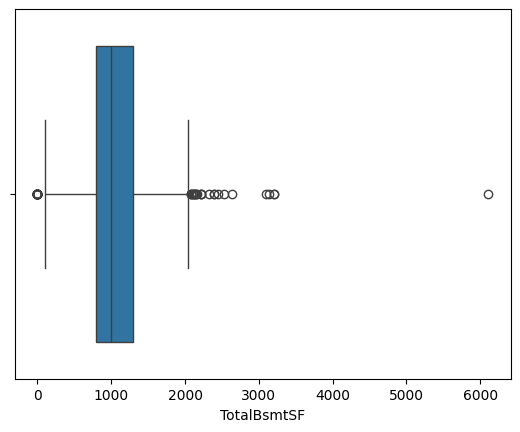

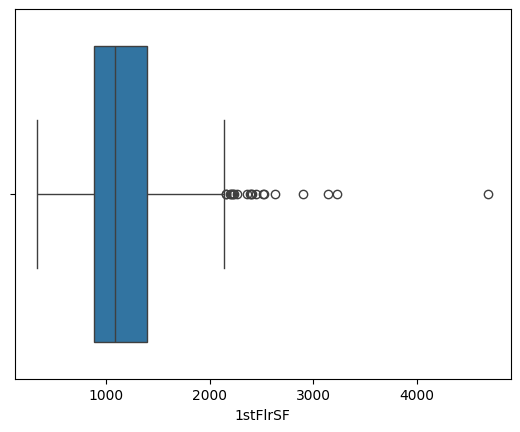

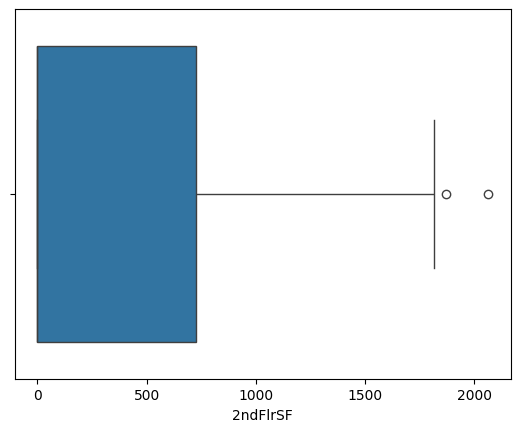

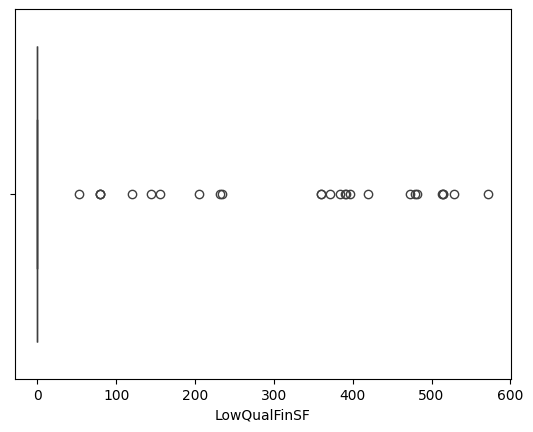

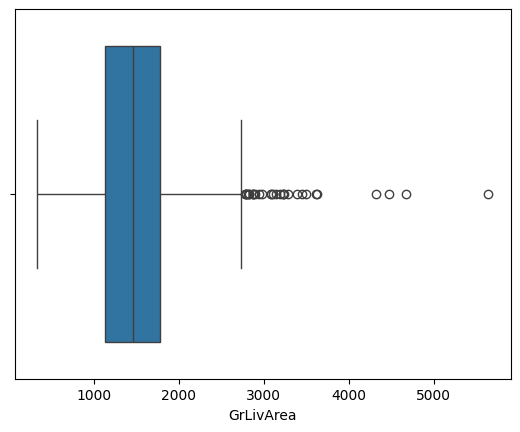

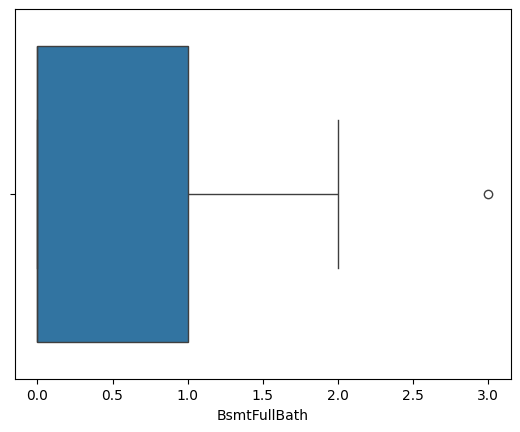

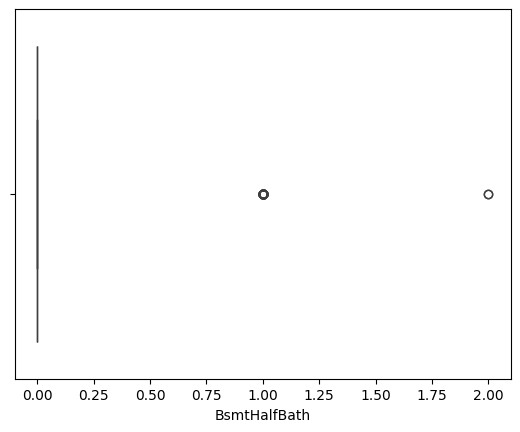

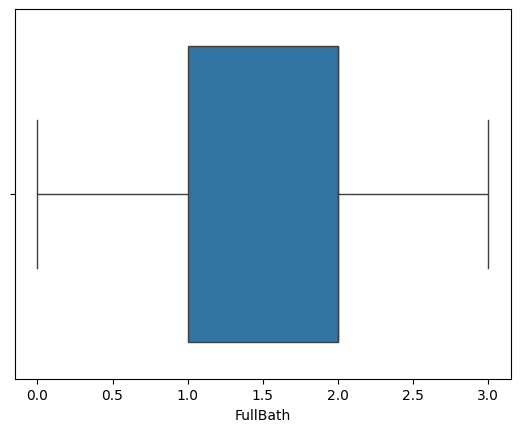

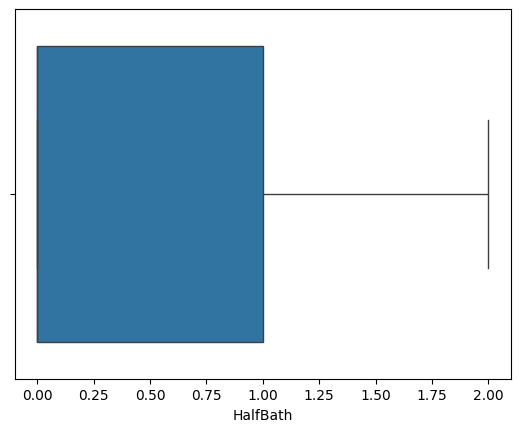

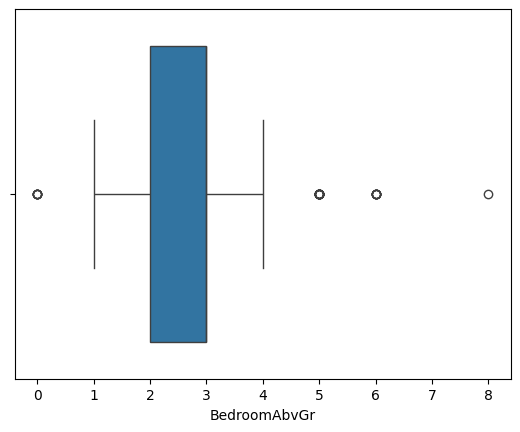

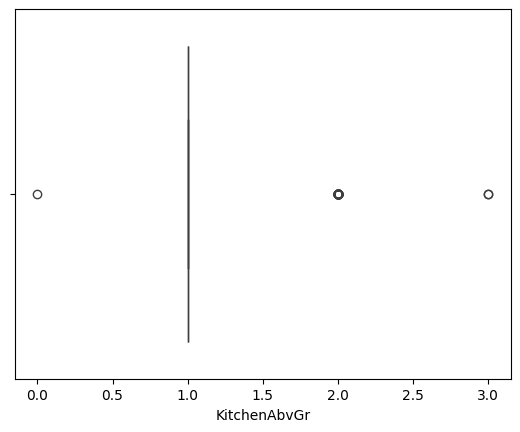

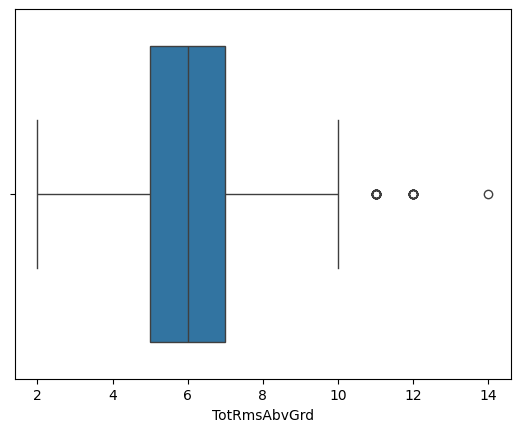

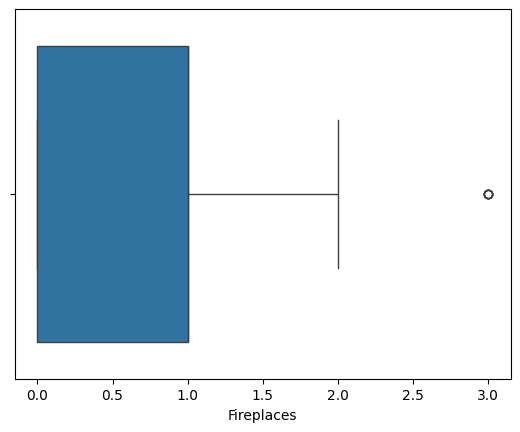

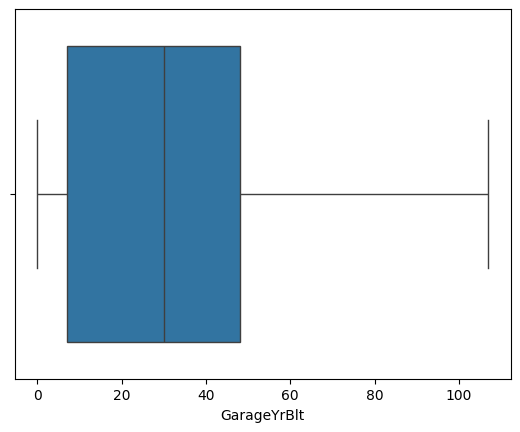

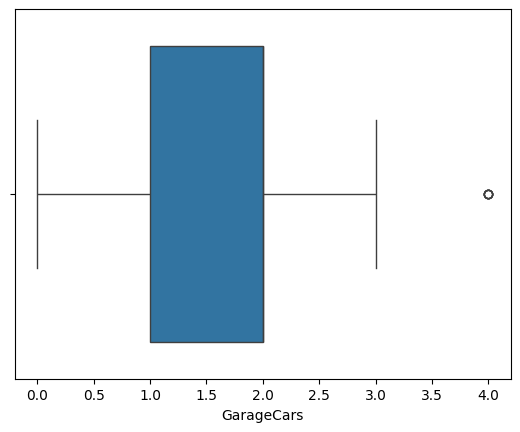

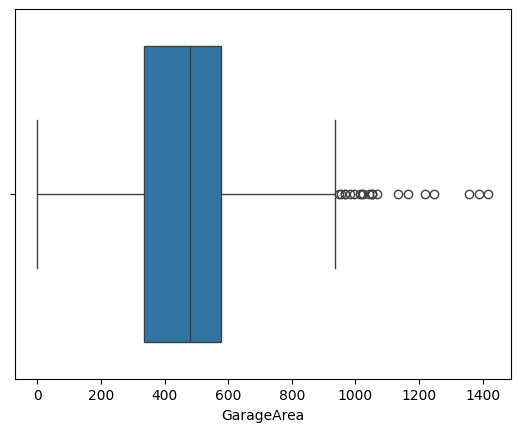

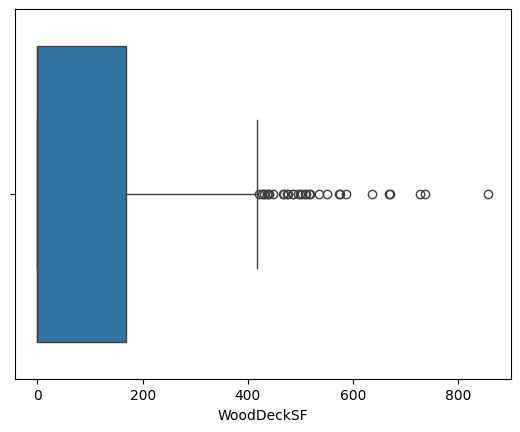

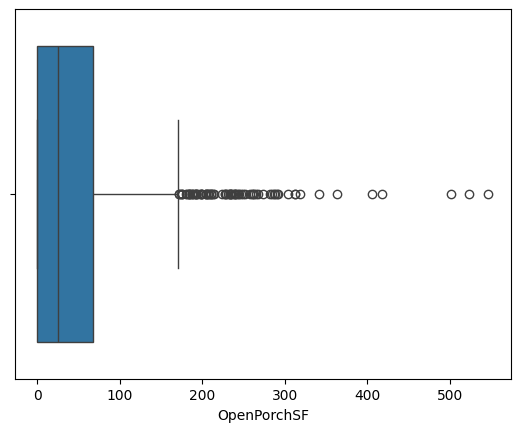

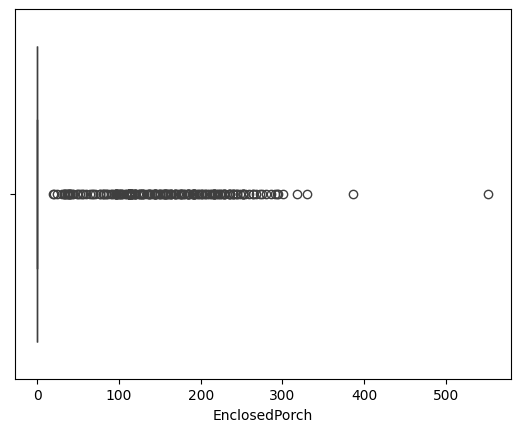

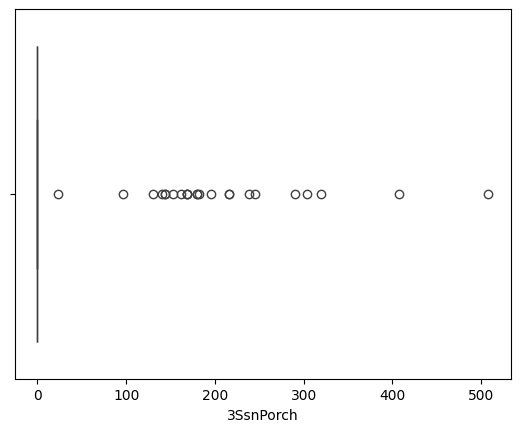

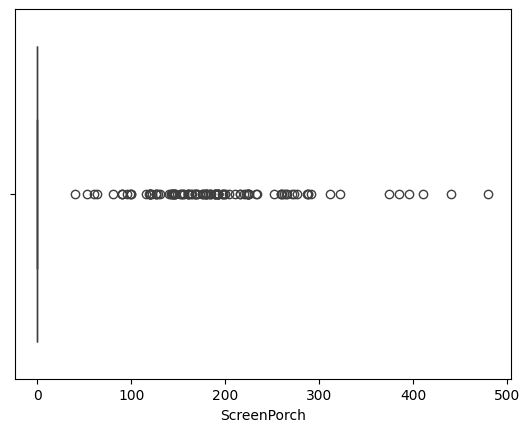

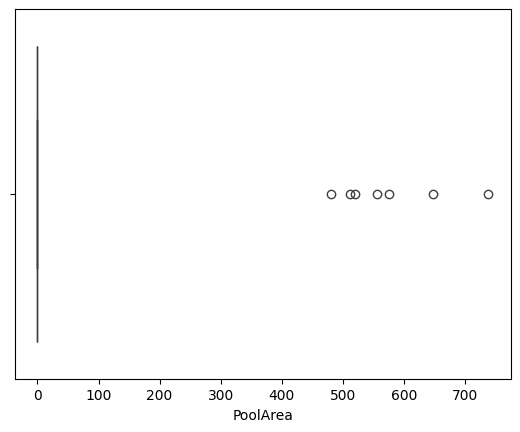

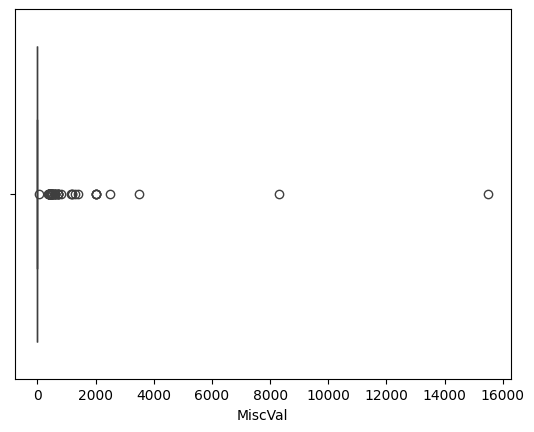

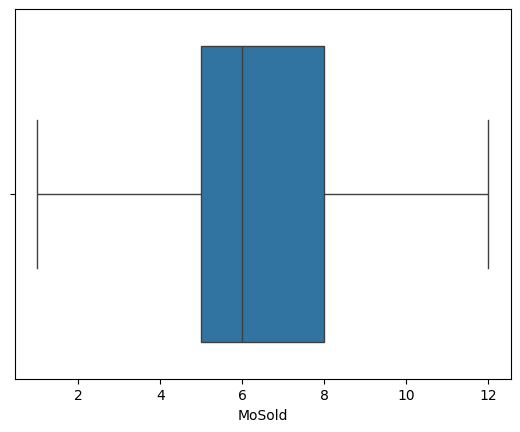

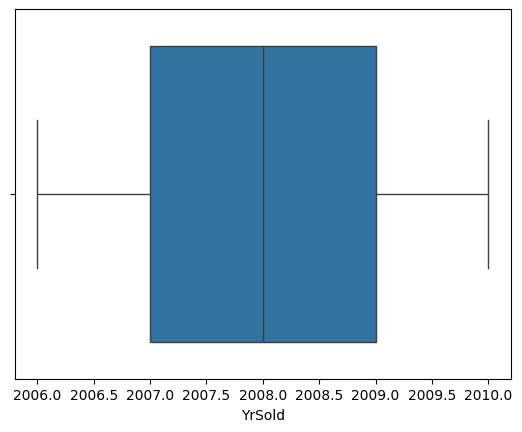

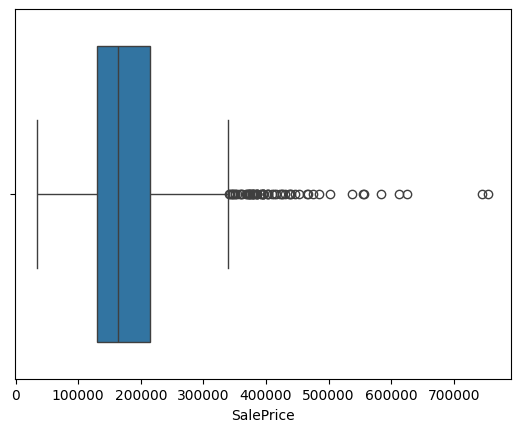

In [ ]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [ ]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw= q1- 1.5*iqr
  uw = q3 + 1.5*iqr
  return lw,uw

In [ ]:
columns_to_treat = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal'#, 'SalePrice'
]

df["SalePrice"] = np.sqrt(df["SalePrice"])

for col in columns_to_treat:
    lw, uw = wisker(df[col])
    df[col] = np.where(df[col] < lw, lw, df[col])
    df[col] = np.where(df[col] > uw, uw, df[col])

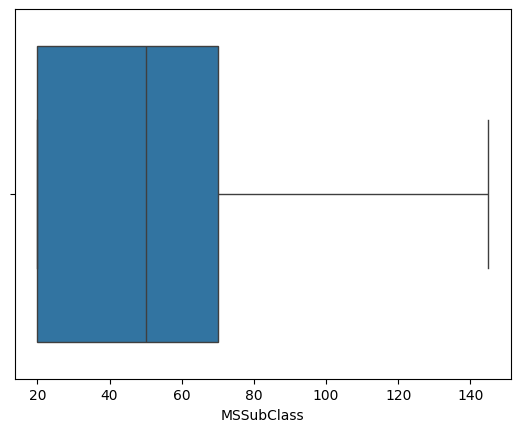

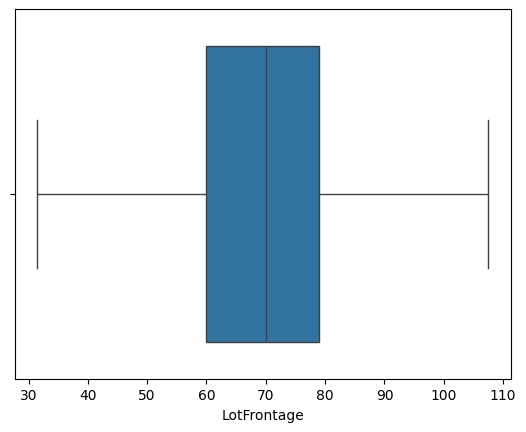

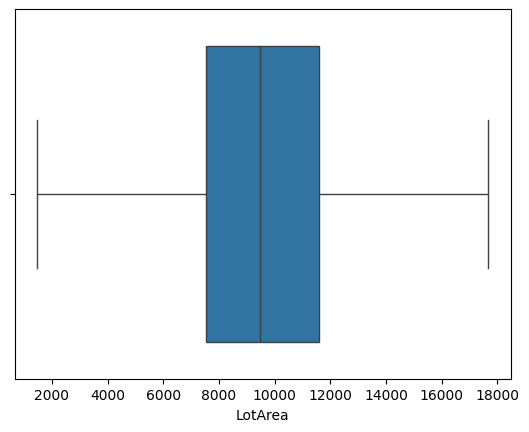

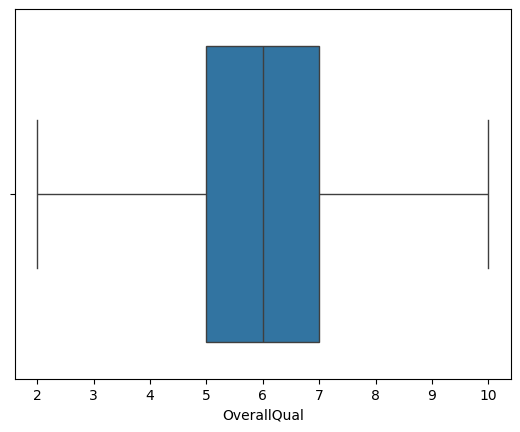

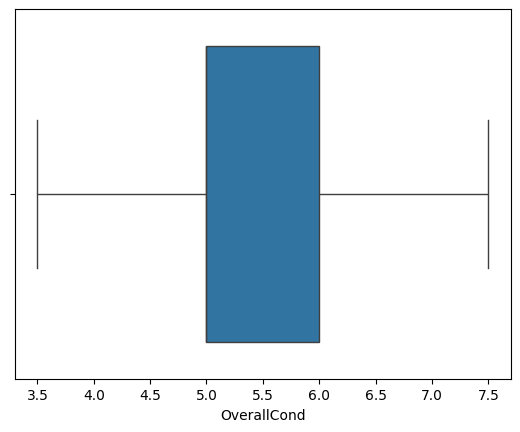

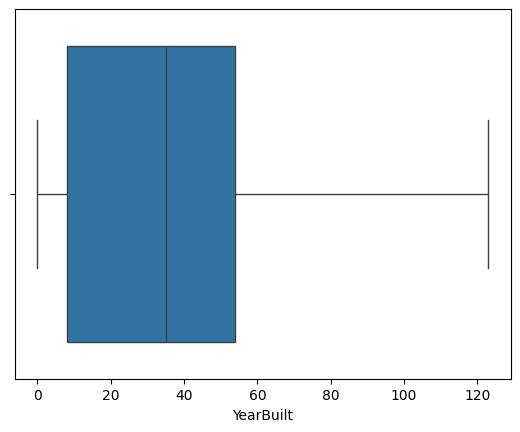

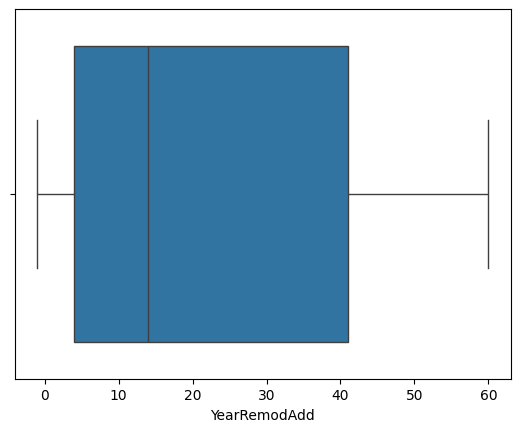

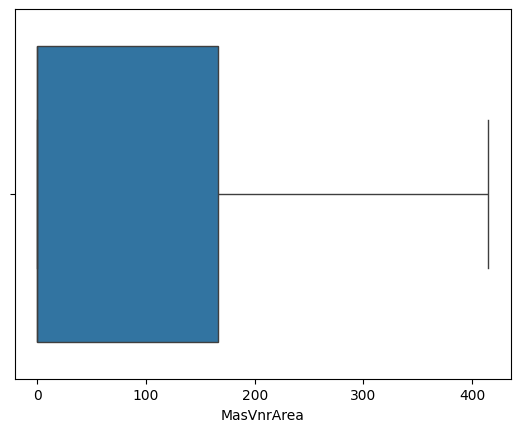

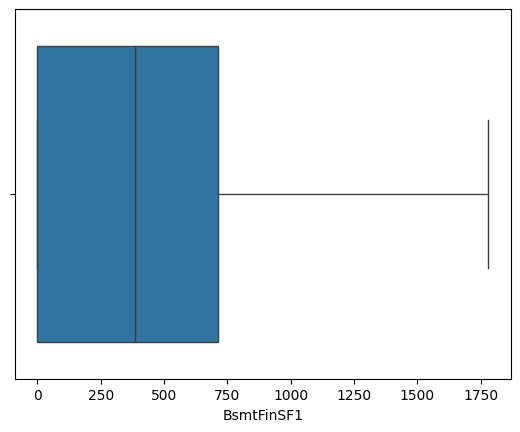

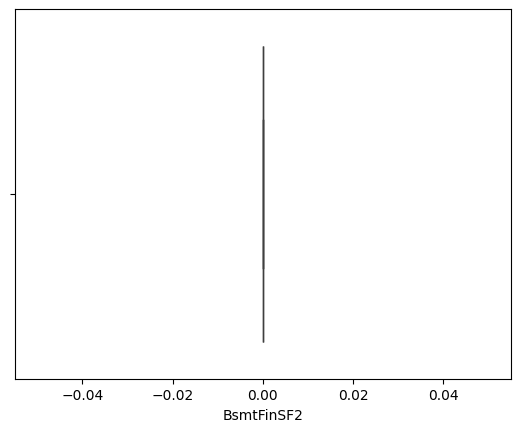

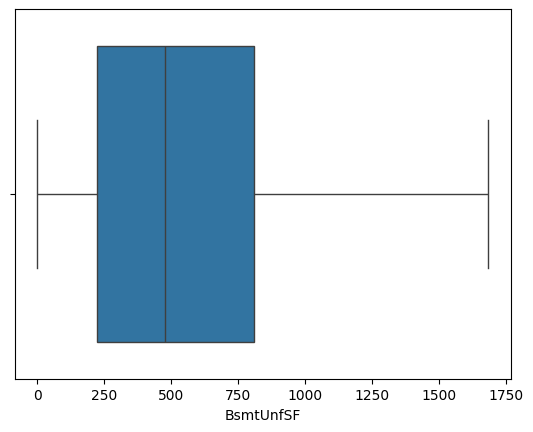

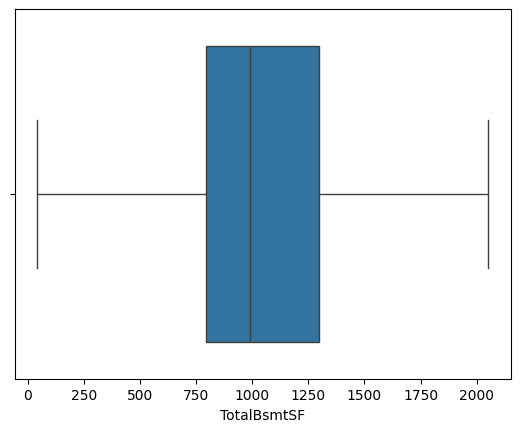

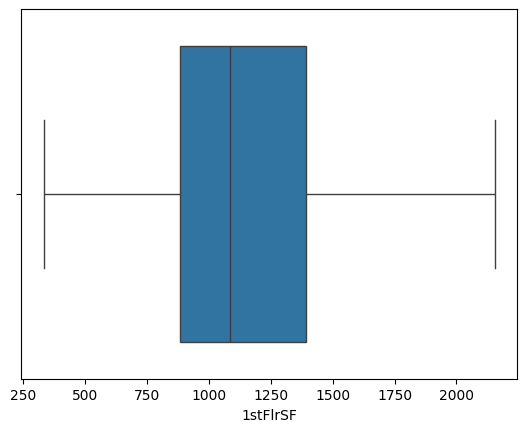

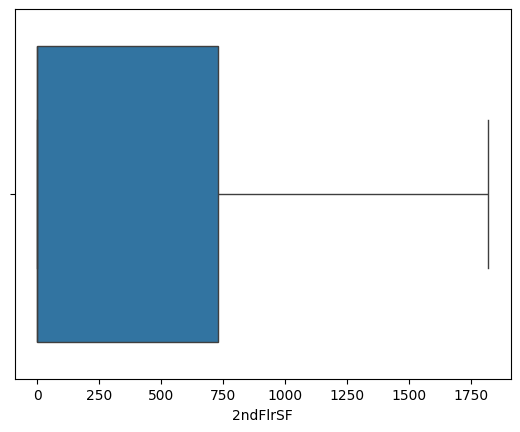

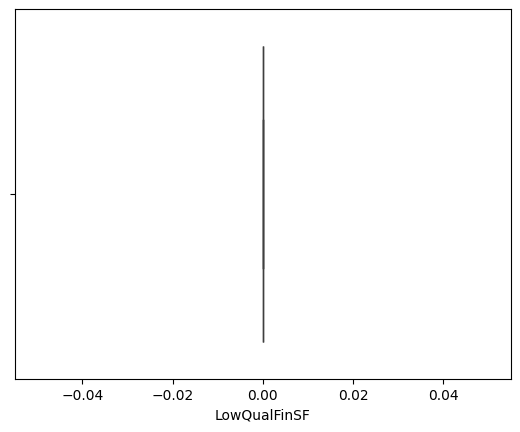

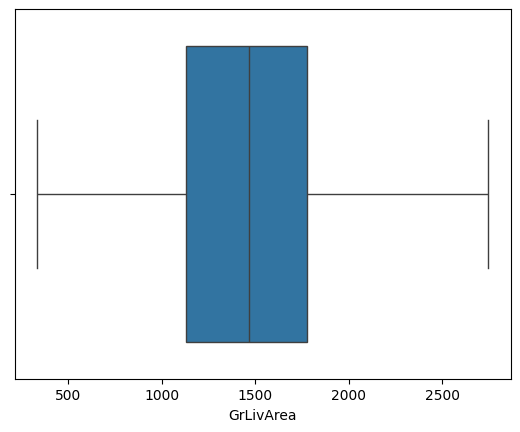

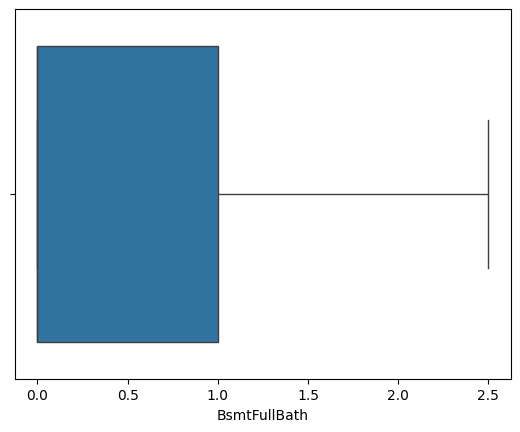

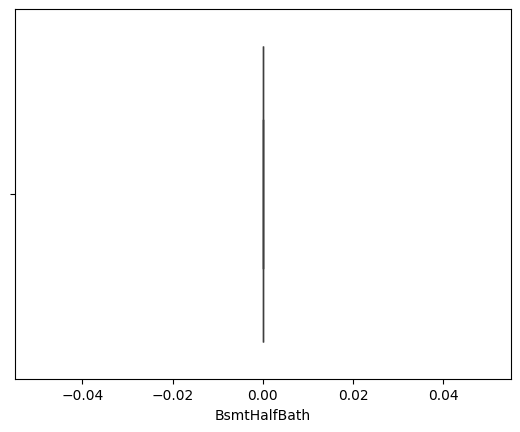

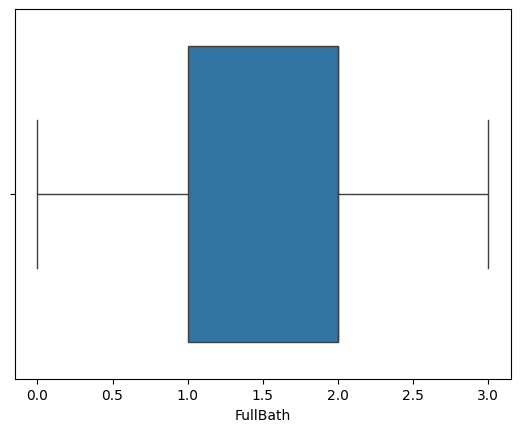

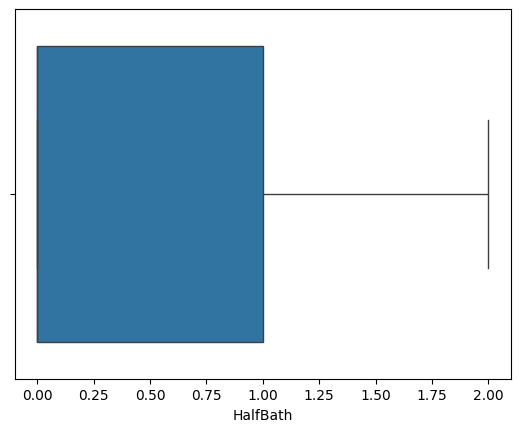

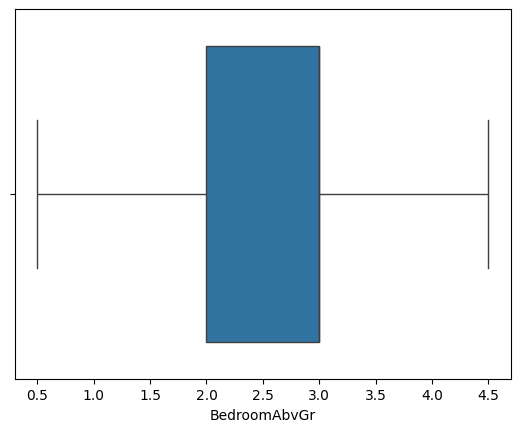

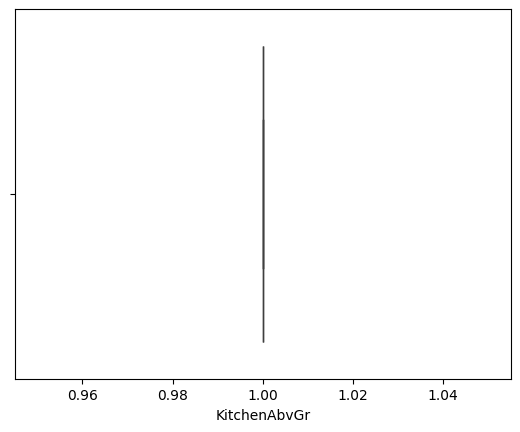

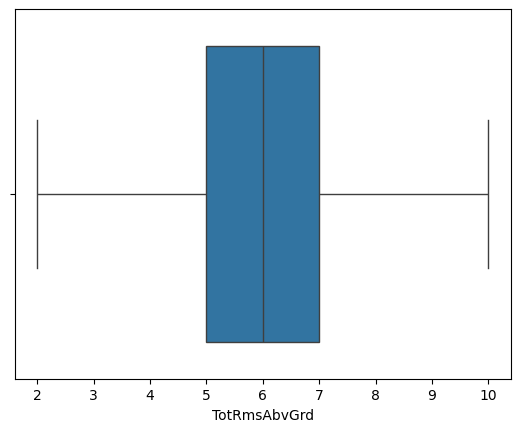

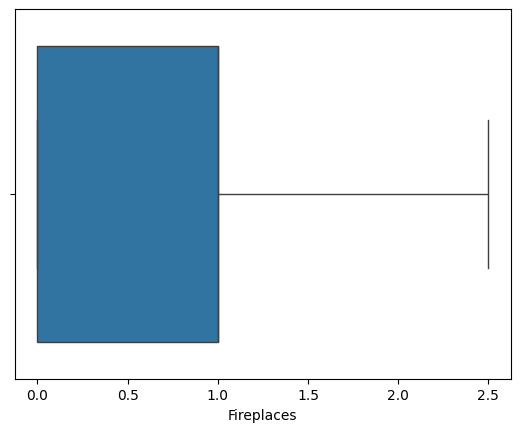

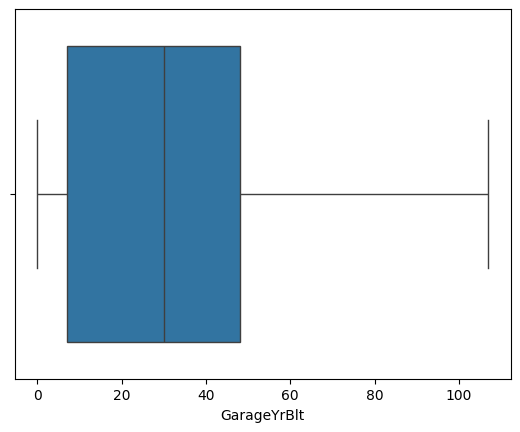

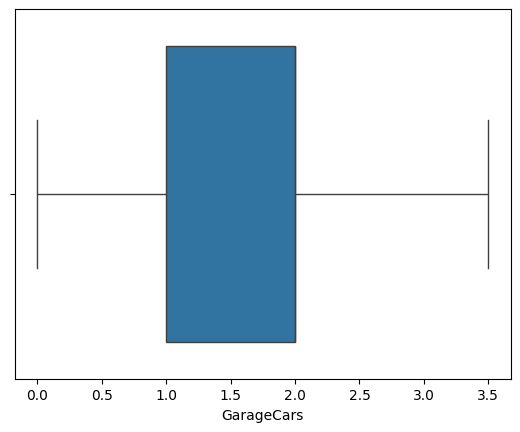

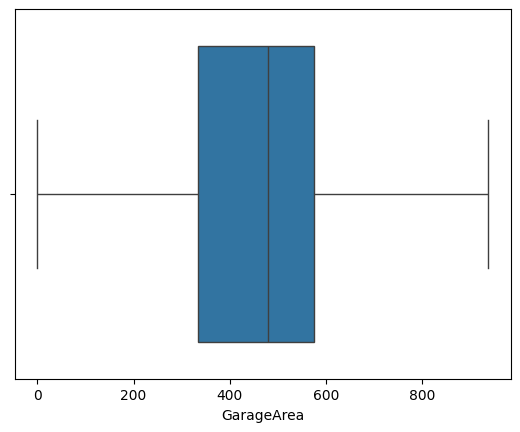

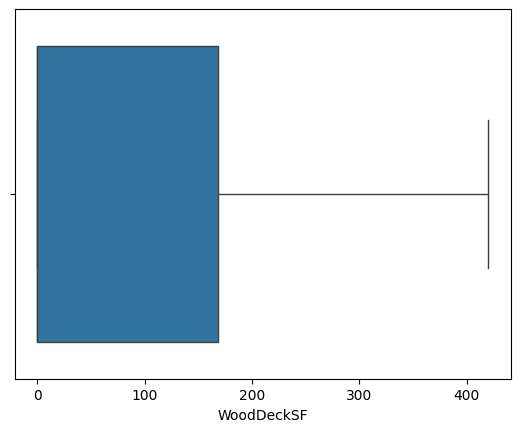

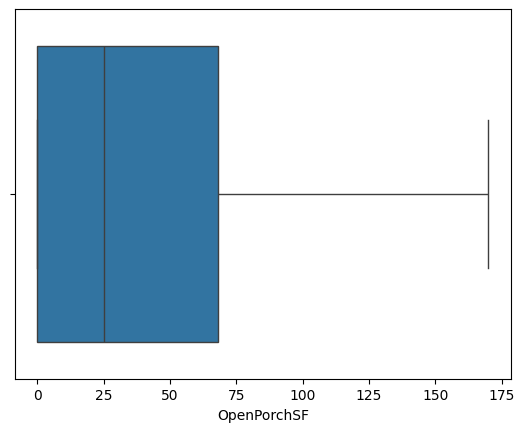

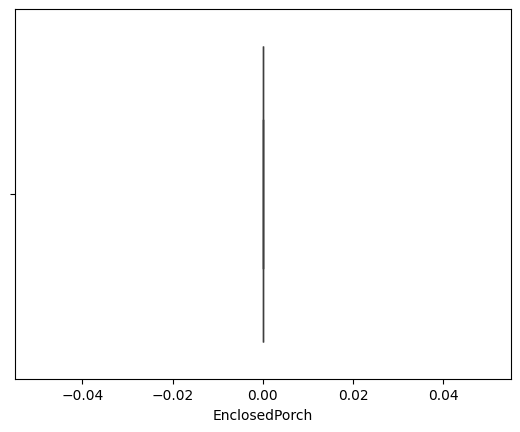

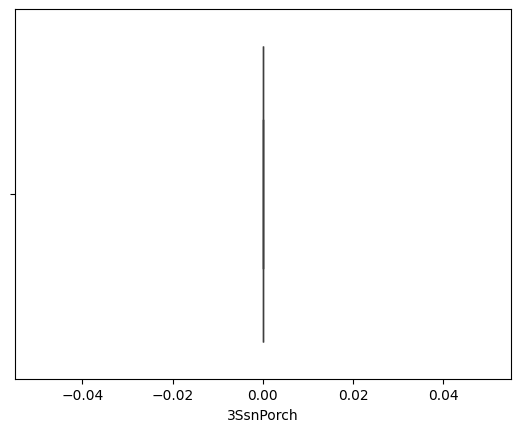

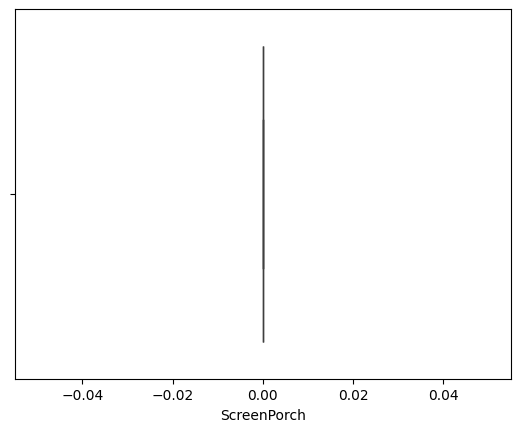

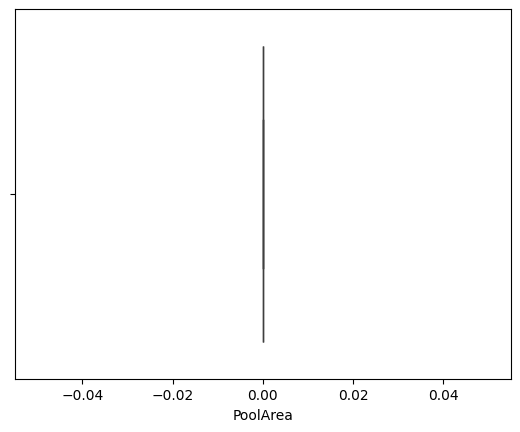

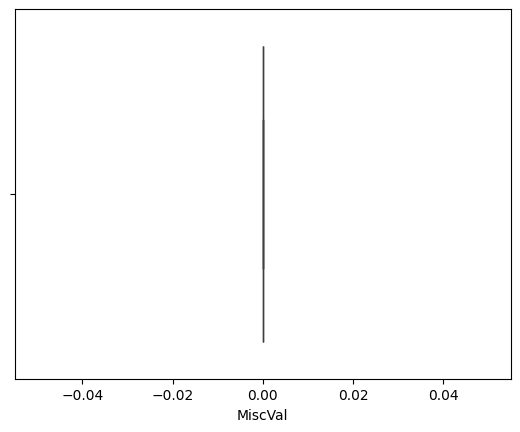

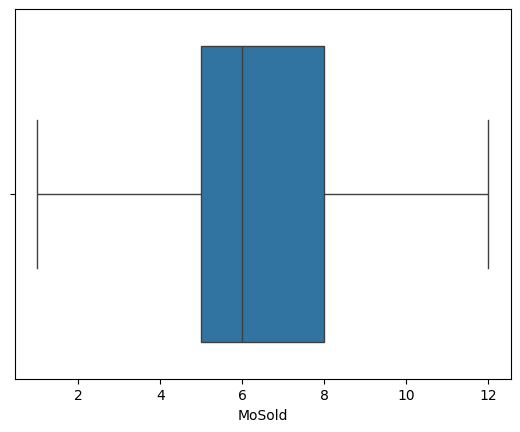

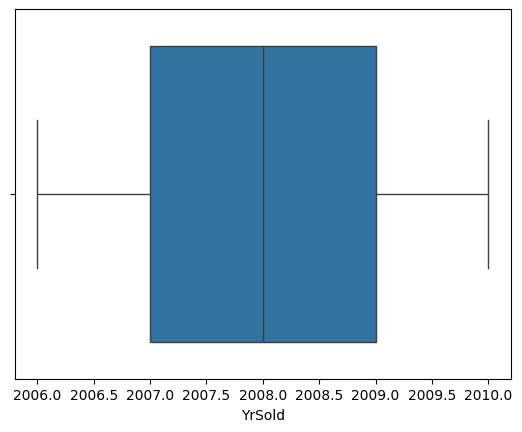

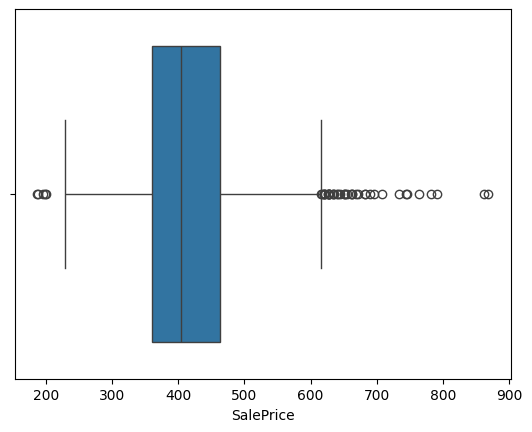

In [ ]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

### Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [ ]:
df["TotalBathrooms"] = (df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]))

df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df["TotalFunctionalSF"] = df["TotalSF"] * df["OverallQual"]

df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodelAge"] = df["YrSold"] - df["YearRemodAdd"]
df["YearsSinceGarageBuilt"] = df["YrSold"] - df["GarageYrBlt"]

quality_map = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df["Overall_Qual_Score"] = df["OverallQual"] * df["OverallCond"]

df["ExteriorQualityScore"] = df["ExterQual"].map(quality_map) * df["ExterCond"].map(quality_map)

bsmtfin_map = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df["BsmtFinType1_Score"] = df["BsmtFinType1"].map(bsmtfin_map).fillna(0)
df["BsmtFinType2_Score"] = df["BsmtFinType2"].map(bsmtfin_map).fillna(0)
df["Bsmt_Qual_Score"] = (
    (df["BsmtFinSF1"] * df["BsmtFinType1_Score"]) +
    (df["BsmtFinSF2"] * df["BsmtFinType2_Score"])
)

drop_cols = [
    "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", "GrLivArea",
    "OverallQual", "OverallCond", "ExterQual", "ExterCond", "YrSold", "YearBuilt", "YearRemodAdd",
    "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "BsmtFinType1_Score",
    "BsmtFinType2_Score"
]

df = df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=False)

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

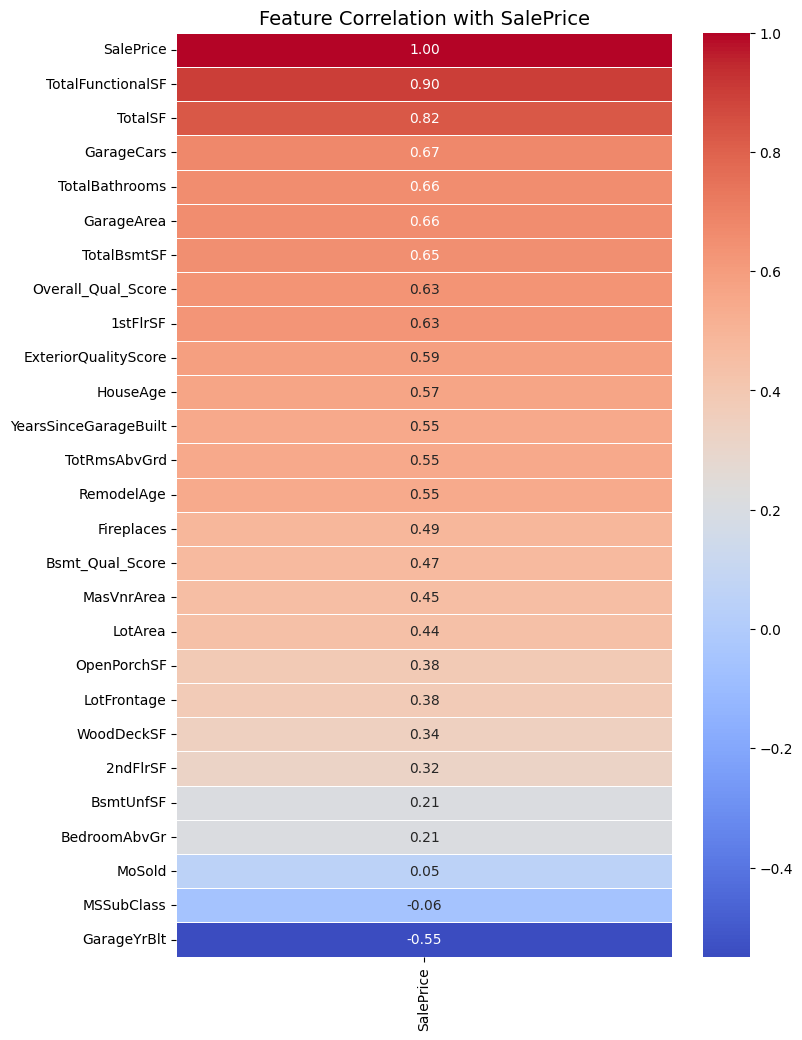

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

corr_with_target = numerical_df.corr()[['SalePrice']].dropna().sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(8, 12))
sns.heatmap(corr_with_target, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Feature Correlation with SalePrice", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

ordinal_features = []
one_hot_features = []

for feature in categorical_features:
    if df[feature].nunique() > 8:
        one_hot_features.append(feature)
    else:
        ordinal_features.append(feature)

if 'SalePrice' in df.columns:
    ordinal_mappings = {}

    for feature in ordinal_features:
        labels_ordered = df.groupby([feature])['SalePrice'].mean().sort_values().index
        ordinal_mappings[feature] = {k: i for i, k in enumerate(labels_ordered, 0)}
        df[feature] = df[feature].map(ordinal_mappings[feature])

else:
    for feature in ordinal_features:
        df[feature] = df[feature].map(ordinal_mappings.get(feature, {})).fillna(0)

df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        60.0         3         65.0   8450.0       1         0            1   
1        20.0         3         80.0   9600.0       1         0            1   
2        60.0         3         68.0  11250.0       1         1            1   
3        70.0         3         60.0   9550.0       1         1            1   
4        60.0         3         84.0  14260.0       1         1            1   

   Utilities  LotConfig  LandSlope  ...  Exterior2nd_Wd Sdng  \
0          1          0          0  ...                False   
1          1          1          0  ...                False   
2          1          0          0  ...                False   
3          1          2          0  ...                False   
4          1          1          0  ...                False   

   Exterior2nd_Wd Shng  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                False         False         False           False   
1                False         False         False           False   
2                False         False         False           False   
3                 True         False         False           False   
4                False         False         False           False   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0           False           False         False         False         True  
1           False           False         False         False         True  
2           False           False         False         False         True  
3           False           False         False         False         True  
4           False           False         False         False         True  

[5 rows x 131 columns]

### Dividing Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models

In [ ]:
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o', color="blue")
    plt.plot(train_sizes, val_scores_mean, label="Validation Error", marker='s', color="red")

    plt.xlabel("epochs")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
reg_linear = LinearRegression()
reg_linear.fit(X_train_scaled, y_train)

train_score = reg_linear.score(X_train_scaled, y_train)
test_score = reg_linear.score(X_test_scaled, y_test)

print(f"Linear Train Score: {train_score:.4f}")
print(f"Linear Test Score: {test_score:.4f}")

# best_model_path = "/content/drive/My Drive/Colab Notebooks/ML_Project/best_model.pkl"
# joblib.dump(reg_linear, best_model_path)

Linear Train Score: 0.9211
Linear Test Score: 0.9176


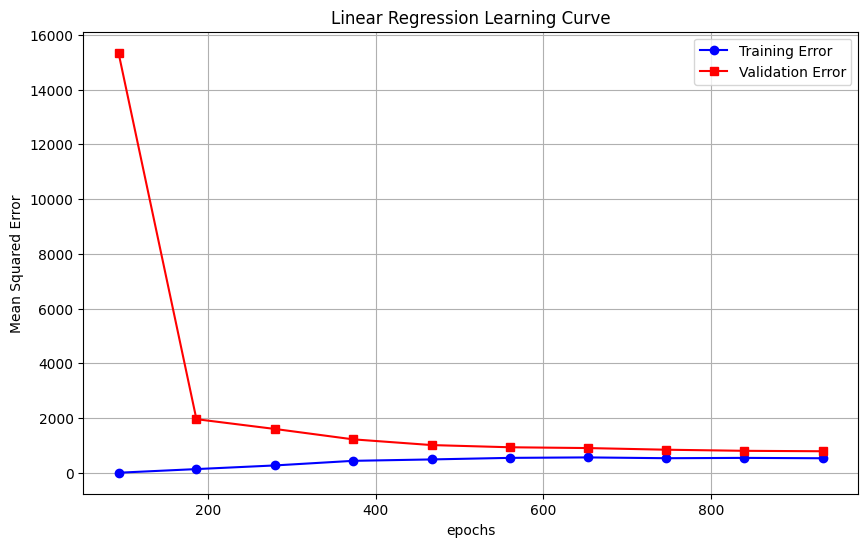

In [ ]:
plot_learning_curve(reg_linear, X_train_scaled, y_train, title="Linear Regression Learning Curve")

In [ ]:
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(fit_intercept=False), param_grid, cv=5, scoring="r2")
ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge Train Score: {best_ridge.score(X_train_scaled, y_train):.4f}")
print(f"Best Ridge Test Score: {best_ridge.score(X_test_scaled, y_test):.4f}")

# best_model_path = "/content/drive/My Drive/Colab Notebooks/ML_Project/best_model.pkl"
# joblib.dump(best_ridge, best_model_path)

Best Ridge Alpha: 1
Best Ridge Train Score: 0.9200
Best Ridge Test Score: 0.9215


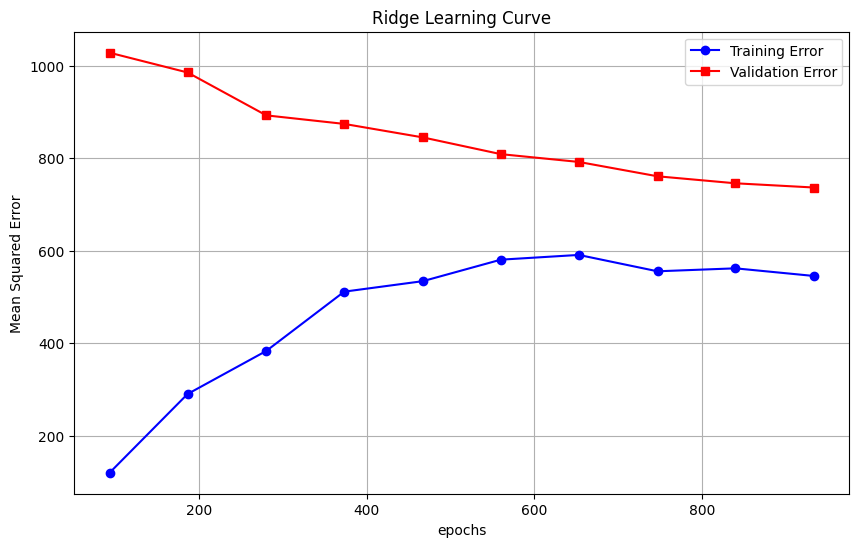

In [ ]:
plot_learning_curve(best_ridge, X_train_scaled, y_train, title="Ridge Learning Curve")

In [ ]:
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(fit_intercept=False), param_grid, cv=5, scoring="r2")
lasso_grid.fit(X_train_scaled, y_train)

best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso Train Score: {best_lasso.score(X_train_scaled, y_train):.4f}")
print(f"Best Lasso Test Score: {best_lasso.score(X_test_scaled, y_test):.4f}")

best_model_path = "/content/drive/My Drive/Colab Notebooks/ML_Project/best_model.pkl"
joblib.dump(best_lasso, best_model_path)

Best Lasso Alpha: 0.1
Best Lasso Train Score: 0.9153
Best Lasso Test Score: 0.9248


['/content/drive/My Drive/Colab Notebooks/ML_Project/best_model.pkl']

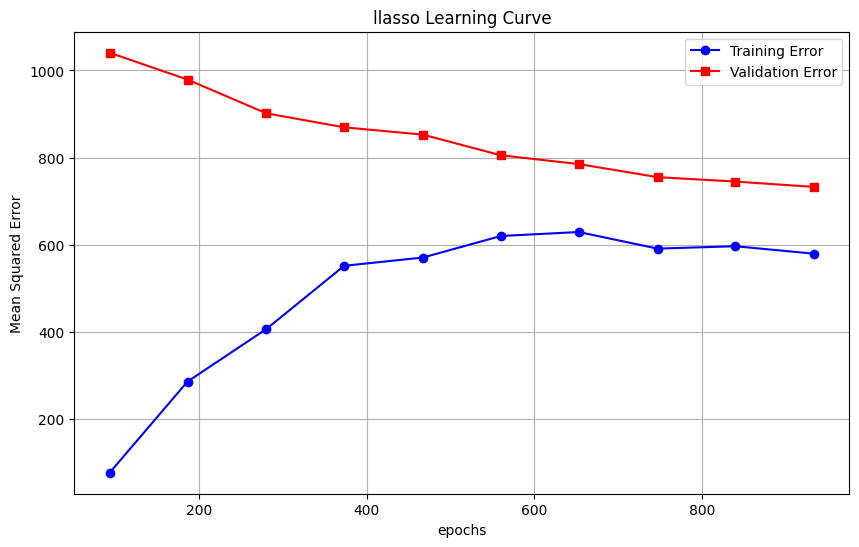

In [ ]:
plot_learning_curve(best_lasso, X_train_scaled, y_train, title="llasso Learning Curve")

### Testing New Data

In [ ]:
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        new_data = pd.read_csv(filename)

    if new_data is not None:
        new_data.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','MasVnrType','FireplaceQu'], axis=1, inplace=True)

        knn_imputer = KNNImputer(n_neighbors=5)
        new_data['LotFrontage'] = knn_imputer.fit_transform(new_data[['LotFrontage']])

        numeric_columns = new_data.select_dtypes(include=["int64", "float64"]).columns
        categorical_columns = new_data.select_dtypes(include=["object"]).columns

        numeric_imputer = KNNImputer(n_neighbors=5)
        new_data[numeric_columns] = numeric_imputer.fit_transform(new_data[numeric_columns])

        for col in categorical_columns:
            new_data[col] = new_data[col].astype(str)
            new_data[col].fillna(new_data[col].mode()[0], inplace=True)

        new_data["TotalBathrooms"] = (new_data["FullBath"] + (0.5 * new_data["HalfBath"]) + new_data["BsmtFullBath"] + (0.5 * new_data["BsmtHalfBath"]))
        new_data["TotalSF"] = new_data["GrLivArea"] + new_data["TotalBsmtSF"]
        new_data["TotalFunctionalSF"] = new_data["TotalSF"] * new_data["OverallQual"]
        new_data["HouseAge"] = new_data["YrSold"] - new_data["YearBuilt"]
        new_data["RemodelAge"] = new_data["YrSold"] - new_data["YearRemodAdd"]
        new_data["YearsSinceGarageBuilt"] = new_data["YrSold"] - new_data["GarageYrBlt"]

        quality_map = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
        new_data["Overall_Qual_Score"] = new_data["OverallQual"] * new_data["OverallCond"]
        new_data["ExteriorQualityScore"] = new_data["ExterQual"].map(quality_map) * new_data["ExterCond"].map(quality_map)

        bsmtfin_map = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
        new_data["BsmtFinType1_Score"] = new_data["BsmtFinType1"].map(bsmtfin_map).fillna(0)
        new_data["BsmtFinType2_Score"] = new_data["BsmtFinType2"].map(bsmtfin_map).fillna(0)
        new_data["Bsmt_Qual_Score"] = (
            (new_data["BsmtFinSF1"] * new_data["BsmtFinType1_Score"]) +
            (new_data["BsmtFinSF2"] * new_data["BsmtFinType2_Score"])
        )

        drop_cols = [
            "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", "GrLivArea",
            "OverallQual", "OverallCond", "ExterQual", "ExterCond", "YrSold", "YearBuilt", "YearRemodAdd",
            "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "BsmtFinType1_Score",
            "BsmtFinType2_Score"
        ]
        new_data.drop(columns=[col for col in drop_cols if col in new_data.columns], inplace=True)

        categorical_features = new_data.select_dtypes(include=['object', 'category']).columns

        ordinal_features = []
        one_hot_features = []

        for feature in categorical_features:
            if new_data[feature].nunique() > 8:
                one_hot_features.append(feature)
            else:
                ordinal_features.append(feature)

        if 'SalePrice' in new_data.columns:
            ordinal_mappings = {}

            for feature in ordinal_features:
                labels_ordered = new_data.groupby([feature])['SalePrice'].mean().sort_values().index
                ordinal_mappings[feature] = {k: i for i, k in enumerate(labels_ordered, 0)}
                new_data[feature] = new_data[feature].map(ordinal_mappings[feature])
        else:
            for feature in ordinal_features:
                new_data[feature] = new_data[feature].map(ordinal_mappings.get(feature, {})).fillna(0)

        new_data = pd.get_dummies(new_data, columns=one_hot_features, drop_first=True)

        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(new_data)

        best_model_path = "/content/drive/My Drive/Colab Notebooks/ML_Project/best_model.pkl"
        if os.path.exists(best_model_path):
            best_model = joblib.load(best_model_path)
            print("Model loaded successfully.")
        else:
            print(f"Error: Model file not found at {best_model_path}. Please check the path.")

        if 'best_model' in locals():
            predictions = best_model.predict(scaled_features)
            print("Predictions on the new dataset:", (predictions ** 2).tolist())
        else:
            print("The 'best_model' variable is not defined.")

    else:
        print("No data to process.")

else:
    print("No file uploaded.")

No file uploaded.
